In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import read_mist_models
from os import listdir
from os.path import isfile, join
import glob
from scipy.interpolate import *
import matplotlib.cm as cm
import math
import scipy.optimize
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib
from joblib import dump,load

CMAP = plt.cm.coolwarm

# Loading in the MIST tracks for [fe/h] =0

In [2]:
eep = read_mist_models.EEP('MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\\30000M.track.eep')
print('available columns: ', eep.hdr_list)

Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\30000M.track.eep
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14', 'center_o16'

In [4]:
def get_mist_data(dir_):
    dir_list = glob.glob(dir_+"\*.eep", recursive=True)
    age, mass, mdot, log_L,log_T = [],[],[],[],[]
    for file in dir_list:
        eep = read_mist_models.EEP(file)
        age.append(eep.eeps['star_age'])
        mass.append(eep.eeps['star_mass'])
        mdot.append(eep.eeps['star_mdot'])
        log_L.append(eep.eeps['log_L'])
        log_T.append(eep.eeps['log_Teff'])
    return age, mass, mdot, log_L,log_T
           
age_full, mass_full, mdot_full, log_L_full,log_T_full = get_mist_data("MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS")

Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00010M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00015M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00020M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00025M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00030M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00031M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00032M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00033M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00034M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00035M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00036M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00037M.track.eep
Read

Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00242M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00244M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00246M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00248M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00250M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00252M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00254M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00256M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00258M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00260M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00262M.track.eep
Reading in: MIST_data/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00264M.track.eep
Read

In [5]:
def flatten(arr):
    new_arr = []
    for m in arr:
        new_arr.extend(list(m))
    return new_arr


def monotonic_indices(arr):
    mon_arr = [[]]
    for x in range(len(arr)-1):
        if(arr[x+1] > arr[x]):
            mon_arr[-1].append(x)
        else: mon_arr.append([x])
    max_ind = 0
    max_size = 0
    for i in range(len(mon_arr)):
        if(np.size(mon_arr[i]) > max_size):
            max_size = np.size(mon_arr[i])
            max_ind = i
    return mon_arr[max_ind]

def is_in(x_eval, x_list):
    return ((np.any(np.array(x_list) <= x_eval)) and (np.any(np.array(x_list) >= x_eval)))

def interp_1d(x,y,x_eval, interp_type):
    y_out =[]
    for x_list, y_list in  zip(x, y):        
        if(is_in(x_eval, x_list)):
            y_out.append(interp1d(x_list,y_list, kind=interp_type)(x_eval))
    return np.array(y_out)

In [6]:
mass_clean, log_L_clean,age_clean=[],[],[]
for m_list, l_list, a_list in zip(mass_full, log_L_full, age_full):
    clean_indices = monotonic_indices(l_list)
    mass_clean.append(np.array(m_list)[clean_indices]), log_L_clean.append(np.array(l_list)[clean_indices]), age_clean.append(np.array(a_list)[clean_indices])
mass,log_L, age = mass_clean, log_L_clean,age_clean

In [7]:
#Checking the clean indices function. Strange behavior for a few tracks
# for n in range(40):
#     #if(mass_full[n][0] > 0.5 or mass_full[n][0]<0.329):continue
#     print(mass_full[n][0])
#     plt.scatter(age_full[n]/1e9, log_L_full[n])
#     plt.scatter(age_clean[n]/1e9, log_L_clean[n]+1)
#     #plt.xlim(-.001,5)
#     plt.show()


In [8]:
a_sol = 4.603e9
m_sol = 1.98847e30
m_ceres = 9.1e20
time = np.linspace(4e9,6e10,30)
mass_range = np.arange(0.2,1.2,0.05)
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels

# Interpolating $L_{stable}$. Trying 2d interpolation and a double 1d interpolation

In [9]:
m_eval = mass_range
a_range = np.linspace(a_sol, a_sol, np.size(mass_range))
a_eval = a_range

### 2d Interpolating on the cleaned data

In [10]:
m,a,l =flatten(mass), flatten(age),flatten(log_L)
linear_interp_2d = griddata((m, a), l, (m_eval,a_eval), method= "linear")
cubic_interp_2d = griddata((m, a), l, (m_eval,a_eval), method= "cubic")

### 2d Interpolating on the whole data set

In [11]:
m,a,l =flatten(mass_full), flatten(age_full),flatten(log_L_full)
linear_interp_2d_full = griddata((m, a), l, (m_eval,a_eval), method= "linear")
cubic_interp_2d_full = griddata((m, a), l, (m_eval,a_eval), method= "cubic")

### double 1D Interpolating on the cleaned data

In [12]:
m_interp_cubic = interp_1d(age, mass, a_sol, "cubic")
l_interp_cubic = interp_1d(age, log_L, a_sol, "cubic")
m_interp_linear = interp_1d(age, mass, a_sol, "linear")
l_interp_linear = interp_1d(age, log_L, a_sol, "linear")

cubic_interp_1d = interp1d(m_interp_cubic,l_interp_cubic, kind="cubic")(m_eval)
linear_interp_1d = interp1d(m_interp_linear,l_interp_linear, kind="linear")(m_eval)

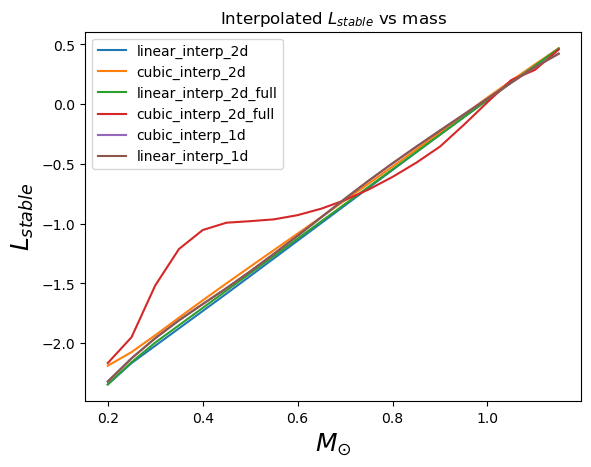

In [13]:
plt.plot(m_eval, linear_interp_2d, label="linear_interp_2d")
plt.plot(m_eval, cubic_interp_2d, label="cubic_interp_2d")
plt.plot(m_eval, linear_interp_2d_full, label="linear_interp_2d_full")
plt.plot(m_eval, cubic_interp_2d_full, label="cubic_interp_2d_full")
plt.plot(m_eval, cubic_interp_1d, label="cubic_interp_1d")
plt.plot(m_eval, linear_interp_1d, label="linear_interp_1d")
plt.title(r"Interpolated $L_{stable}$ vs mass")
plt.ylabel(r"$L_{stable}$")
plt.xlabel(r"$M_{\odot}$")
plt.legend()
plt.show()

Almost all $L_{stable}s are the same, except for the cubic_interp_2d

In [14]:
l_stables = cubic_interp_1d

In [15]:
print(l_stables)

[-2.32102718 -2.12704201 -1.95845604 -1.80935456 -1.67325158 -1.53973147
 -1.39930834 -1.25248766 -1.10138578 -0.94654699 -0.79045354 -0.63960398
 -0.49542502 -0.35634809 -0.22090949 -0.08731277  0.04565944  0.17915892
  0.30912374  0.42239262]


# Interpolating mass across time for $L_{stable}$s

In [86]:
a_eval = time

### 2d

In [87]:
m_linear_2d_poly,m_cubic_2d_poly = [],[]
a3, m3 =[],[]
m,a,l =flatten(mass), flatten(age),flatten(log_L)
for l_stable in l_stables:
    l_eval = np.linspace(l_stable, l_stable,len(time))
    y_linear = griddata((a,l), m, (a_eval,l_eval), method= "linear")
    a3.append(a_eval)
    m3.append(y_linear)
    m_linear_2d_poly.append(np.poly1d(np.polyfit(a_eval, y_linear,3)))
    y_cubic = griddata((a,l), m, (a_eval,l_eval), method= "cubic")
    m_cubic_2d_poly.append(np.poly1d(np.polyfit(a_eval, y_cubic,3)))

In [88]:
# for x in range(len(m3)):
#     plt.scatter(a3[x],m3[x])
# plt.show()

### 1d

In [89]:
m_cubic_1d_poly, m_linear_1d_poly = [],[]
m2,a2 = [],[]

for l_stable in l_stables:
    m_interp = interp_1d(log_L,mass, l_stable, "cubic")
    a_interp = interp_1d(log_L,age, l_stable, "cubic") 
    m_cubic_1d_poly.append(np.poly1d(np.polyfit(a_interp, m_interp,3)))  
    m_interp = interp_1d(log_L,mass, l_stable, "linear")
    a_interp = interp_1d(log_L,age, l_stable, "linear")
    m2.append(m_interp)
    a2.append(a_interp)
    m_linear_1d_poly.append(np.poly1d(np.polyfit(a_interp, m_interp,3)))   

C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: R

In [19]:
# for x in range(len(m3)):
#     plt.scatter(a2[x]/1e9,m2[x])
# plt.xlim(0,60)
# plt.show()

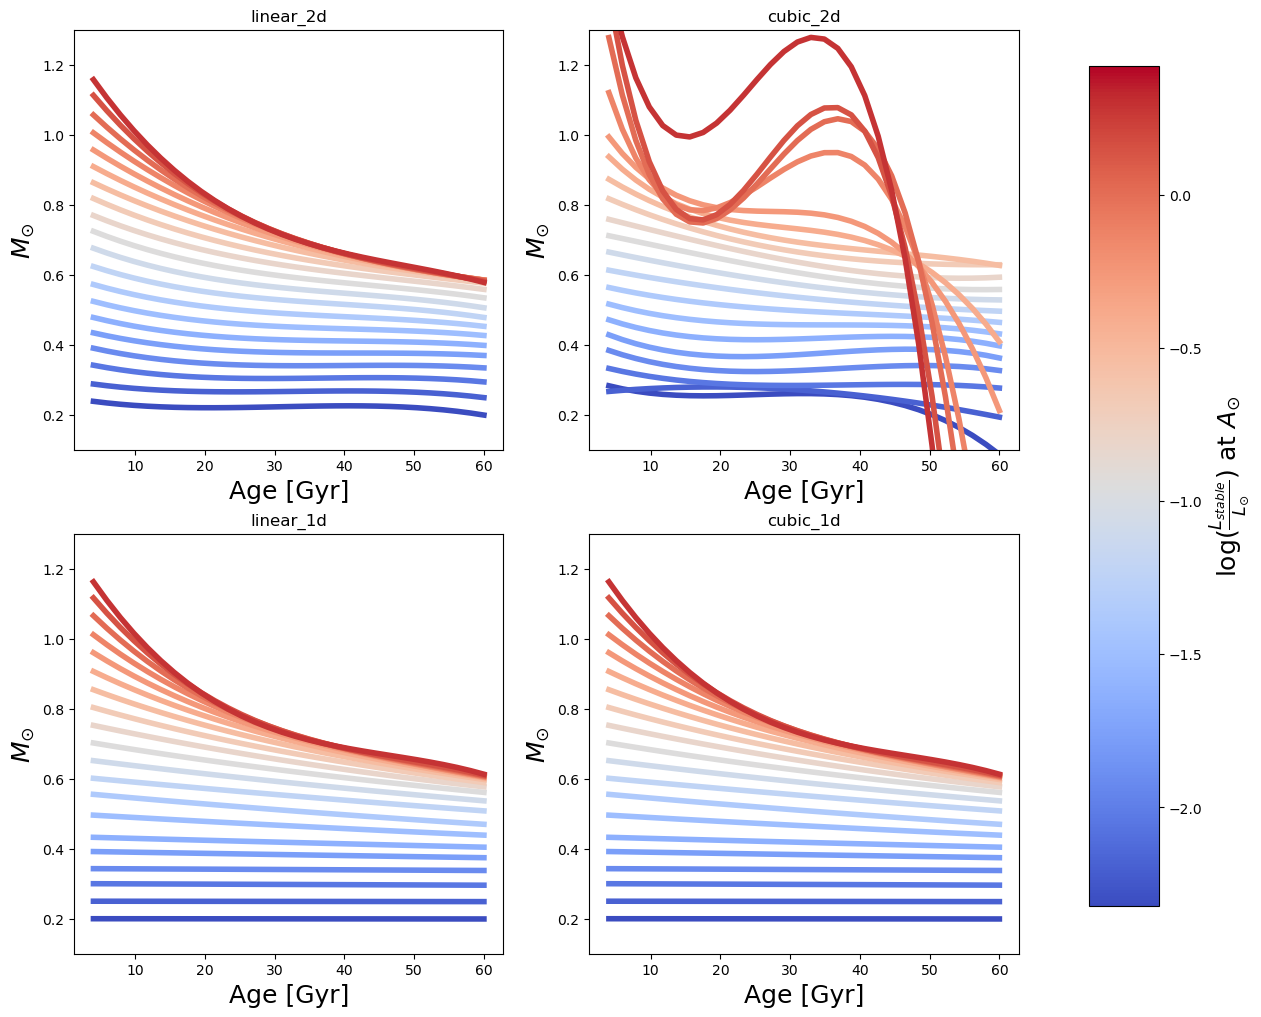

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14,12))
titles = ["linear_2d", "cubic_2d", "linear_1d", "cubic_1d"]
data_sets = [m_linear_2d_poly, m_cubic_2d_poly, m_linear_1d_poly, m_cubic_1d_poly]

for title, ds, i in zip(titles, data_sets, range(4)):
    a = math.floor(i/2.0)%2
    b = i%2
    for x,l_stable in enumerate(l_stables):
        axs[a][b].plot(a_eval/1e9, ds[x](a_eval), c=CMAP(x/len(l_stables)), lw=4)
    c = axs[a][b].scatter(np.linspace(a_sol,a_sol,len(l_stables))/1e9, mass_range, cmap=CMAP, c=l_stables,s=0)
    axs[a][b].title.set_text(title)
    axs[a][b].set_xlabel("Age [Gyr]")
    axs[a][b].set_ylabel(r"$M_{\odot}$")
    axs[a][b].set_ylim(0.1,1.3)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(c, cax=cbar_ax, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\odot}$")
plt.savefig("figures/mass_vs_age_comp.pdf")
plt.show()

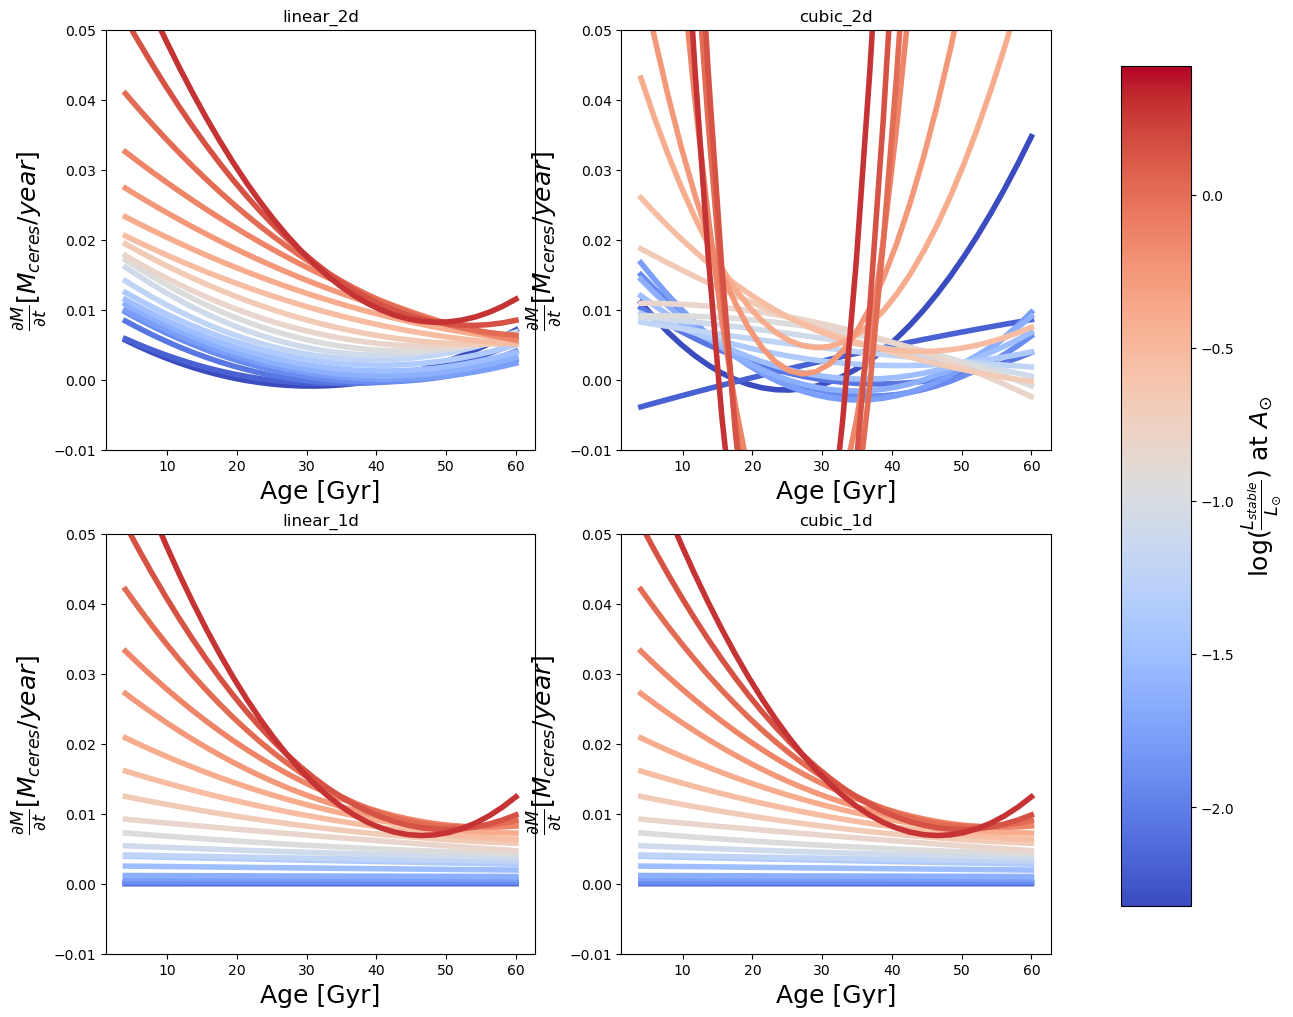

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14,12))
titles = ["linear_2d", "cubic_2d", "linear_1d", "cubic_1d"]
data_sets = [m_linear_2d_poly, m_cubic_2d_poly, m_linear_1d_poly, m_cubic_1d_poly]

for title, ds, i in zip(titles, data_sets, range(4)):
    a = math.floor(i/2.0)%2
    b = i%2
    scatter_pts = []
    for x,l_stable in enumerate(l_stables):
        axs[a][b].plot(a_eval/1e9, -np.polyder(ds[x])(a_eval)*m_sol/m_ceres, c=CMAP(x/len(l_stables)), lw=4)
        scatter_pts.append(np.polyder(ds[x])(a_eval)[0])
    c = axs[a][b].scatter(np.linspace(a_sol,a_sol,len(l_stables))/1e9, scatter_pts, cmap=CMAP, c=l_stables, s=0)
    axs[a][b].title.set_text(title)
    axs[a][b].set_xlabel("Age [Gyr]")
    axs[a][b].set_ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
    axs[a][b].set_ylim(-0.01,0.05)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(c, cax=cbar_ax, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\odot}$")
plt.savefig("figures/dmdt_vs_age_comp.pdf")
plt.show()

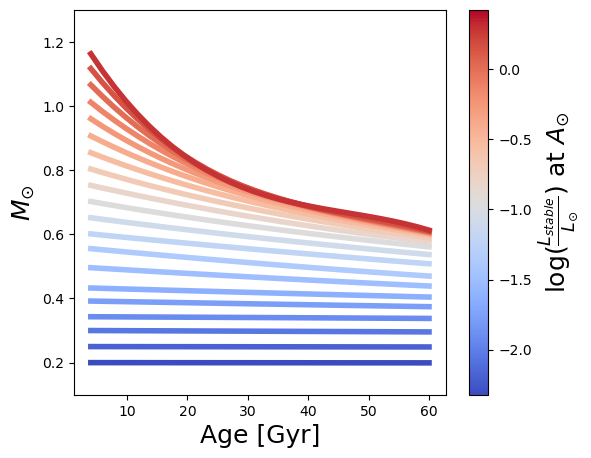

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(6,5))


for x,l_stable in enumerate(l_stables):
    axs.plot(a_eval/1e9, m_linear_1d_poly[x](a_eval), c=CMAP(x/len(l_stables)), lw=4)
c = axs.scatter(np.linspace(a_sol,a_sol,len(l_stables))/1e9, mass_range, cmap=CMAP, c=l_stables,s=0)
axs.set_xlabel("Age [Gyr]")
axs.set_ylabel(r"$M_{\odot}$")
axs.set_ylim(0.1,1.3)

fig.colorbar(c, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\odot}$")
plt.savefig("figures/mass_vs_age.pdf")
plt.show()

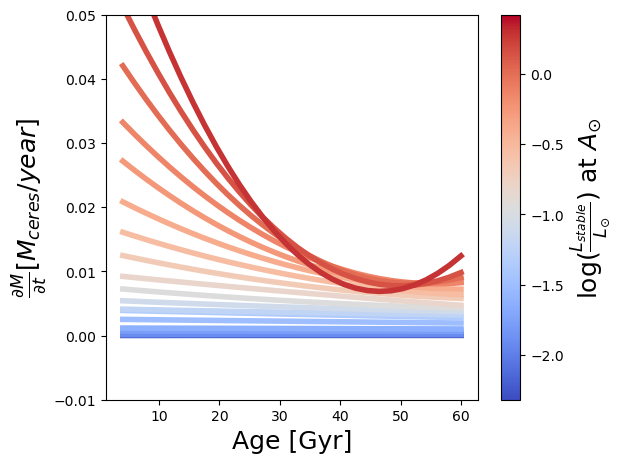

In [23]:
fig, axs = plt.subplots(1,1, figsize=(6,5))

scatter_pts = []
for x,l_stable in enumerate(l_stables):
    axs.plot(a_eval/1e9, -np.polyder(m_linear_1d_poly[x])(a_eval)*m_sol/m_ceres, c=CMAP(x/len(l_stables)), lw=4)
    scatter_pts.append(np.polyder(ds[x])(a_eval)[0])
c = axs.scatter(np.linspace(a_sol,a_sol,len(l_stables))/1e9, scatter_pts, cmap=CMAP, c=l_stables, s=0)
axs.set_xlabel("Age [Gyr]")
axs.set_ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
axs.set_ylim(-0.01,0.05)

fig.colorbar(c, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\odot}$")
plt.savefig("figures/dmdt_vs_age.pdf")
plt.show()

# Checking dmdt against another set of evolutionary tracks

https://www.unige.ch/sciences/astro/evolution/en/database/

In [130]:
def get_geneva_data(file):
    f = open(file)
    age_full, mass_full, log_L_full, log_T_full = [],[],[],[]
    a=[]
    for i,line in enumerate(f):
        if(i==0): continue
        if("Isochrone" in line): 
            age = float(line.split()[-1])
            new_track = True
            continue
        if(new_track):
            if(len(a) > 0):
                age_full.append(a)
                mass_full.append(m)
                log_L_full.append(l)
                log_T_full.append(t)
            a,m,l,t = [],[],[],[]
        
        s=line.split()
        if(s==[]): continue
        mass, log_T, log_L = float(s[0]), float(s[3]), float(s[4])
        a.append(age), m.append(mass), l.append(log_L), t.append(log_T)            
        new_track = False
        
    return age_full,mass_full,log_L_full, log_T_full

file1, file2 = "geneva_data/low_mass.dat", "geneva_data/medium_mass.dat"        
log_age_full,mass_full,log_L_full, log_T_full = get_geneva_data(file1)
age_full = [[10**a for a in list_] for list_ in log_age_full]

age_filt = np.where(np.array([xi[0] for xi in log_age_full]) >7.7)
age_full, mass_full, log_L_full = np.array(age_full)[age_filt].tolist(), np.array(mass_full)[age_filt].tolist(), np.array(log_L_full)[age_filt].tolist()

<ipython-input-130-5d942bd1e49e>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  age_full, mass_full, log_L_full = np.array(age_full)[age_filt].tolist(), np.array(mass_full)[age_filt].tolist(), np.array(log_L_full)[age_filt].tolist()


In [131]:
a_sol = 4.603e9
m_sol = 1.98847e30
m_ceres = 9.1e20
time = np.linspace(4e9,6e10,30)
CMAP = plt.cm.coolwarm
mass_range = np.arange(0.6,1.2,0.05)
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels

In [132]:
def flatten(arr):
    new_arr = []
    for m in arr:
        new_arr.extend(list(m))
    return new_arr


def monotonic_indices(arr):
    mon_arr = [[]]
    for x in range(len(arr)-1):
        if(arr[x+1] > arr[x]):
            mon_arr[-1].append(x)
        else: mon_arr.append([x])
    max_ind = 0
    max_size = 0
    for i in range(len(mon_arr)):
        if(np.size(mon_arr[i]) > max_size):
            max_size = np.size(mon_arr[i])
            max_ind = i
    return mon_arr[max_ind]

def is_in(x_eval, x_list):
    return ((np.any(np.array(x_list) <= x_eval)) and (np.any(np.array(x_list) >= x_eval)))

def interp_1d(x,y,x_eval, interp_type):
    y_out =[]
    for x_list, y_list in  zip(x, y): 
        if(is_in(x_eval, x_list)):
            y_out.append(interp1d(x_list,y_list, kind=interp_type)(x_eval))
    return np.array(y_out)

In [133]:
# mass_clean, log_L_clean,age_clean=[],[],[]
# for m_list, l_list, a_list in zip(mass_full, log_L_full, age_full):
#     clean_indices = monotonic_indices(l_list)
#     mass_clean.append(np.array(m_list)[clean_indices]), log_L_clean.append(np.array(l_list)[clean_indices]), age_clean.append(np.array(a_list)[clean_indices])
# mass,log_L, age = mass_clean, log_L_clean,age_clean

In [134]:
m_eval = mass_range
a_range = np.linspace(a_sol, a_sol, np.size(mass_range))
a_eval = a_range

In [135]:
m_mist = np.array([0.5994347149783262, 0.6494566038211698, 0.6994568328332976, 0.7494591119859643, 0.7994956369318379, 0.8495638921448947, 0.8996438619390628, 0.9196822996445082, 0.9397207212010599, 0.9597585681781505, 0.9797974727029, 0.9998374015154522, 1.0198778546895295, 1.0399184512603128, 1.0599589524781916, 1.0799951642453276])
a_mist = np.array([61991817490.78149, 47476262481.5127, 37039460151.541084, 29120150305.625435, 22637864171.493893, 17048404273.450369, 12325389545.932219, 10562037749.967266, 8920869525.620043, 7404489671.207662, 5971571635.572615, 4613714943.317658, 3334962928.689766, 2136679291.184396, 1018524614.948083, 83215475.54125668])

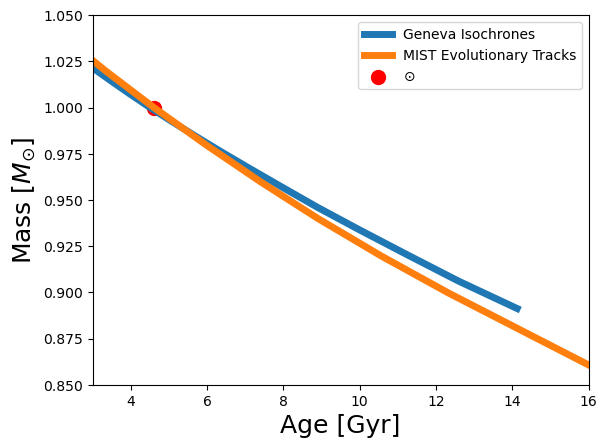

In [137]:
mass_interp =[]
ages = []
for x_list, y_list, a in  zip(log_L_full, mass_full, age_full): 
    if(is_in(0, x_list)):
        mass_interp.append(interp1d(x_list,y_list, kind="linear")(0))
        ages.append(a[0])

plt.plot(np.array(ages)/1e9, np.array(mass_interp).tolist(), label="Geneva Isochrones", lw=5)
plt.plot(a_mist/1e9,m_mist, label="MIST Evolutionary Tracks", lw=5)
plt.scatter(a_sol/1e9, 1, label = r"$\odot$", c="red", s=100)
plt.ylabel(r"Mass [$M_{\odot}$]")
plt.xlabel("Age [Gyr]")
plt.legend()
plt.xlim(3,16)
plt.ylim(0.85,1.05)
plt.savefig("figures/MIST_vs_geneva_low_mass.pdf")
plt.show()

<ipython-input-129-4291cb2bcf0a>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  age_full, mass_full, log_L_full = np.array(age_full)[age_filt].tolist(), np.array(mass_full)[age_filt].tolist(), np.array(log_L_full)[age_filt].tolist()


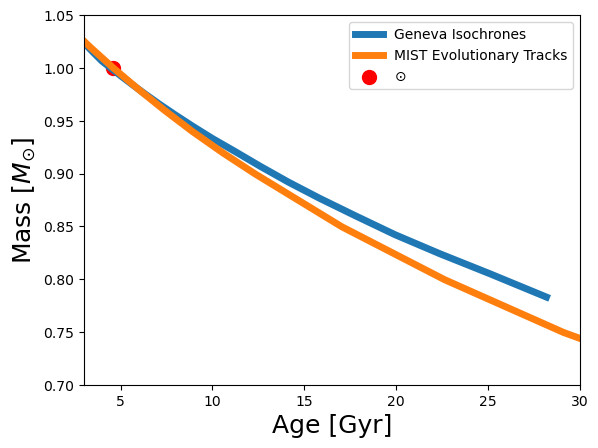

In [129]:
log_age_full,mass_full,log_L_full, log_T_full = get_geneva_data(file2)
age_full = [[10**a for a in list_] for list_ in log_age_full]

age_filt = np.where(np.array([xi[0] for xi in log_age_full]) >7.7)
age_full, mass_full, log_L_full = np.array(age_full)[age_filt].tolist(), np.array(mass_full)[age_filt].tolist(), np.array(log_L_full)[age_filt].tolist()


a_sol = 4.603e9
m_sol = 1.98847e30
m_ceres = 9.1e20
time = np.linspace(4e9,6e10,30)
CMAP = plt.cm.coolwarm
mass_range = np.arange(0.6,1.2,0.05)
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels


m_eval = mass_range
a_range = np.linspace(a_sol, a_sol, np.size(mass_range))
a_eval = a_range


mass_interp =[]
ages = []
for x_list, y_list, a in  zip(log_L_full, mass_full, age_full): 
    if(is_in(0, x_list)):
        mass_interp.append(interp1d(x_list,y_list, kind="linear")(0))
        ages.append(a[0])

plt.plot(np.array(ages)/1e9, np.array(mass_interp).tolist(), label="Geneva Isochrones", lw=5)
plt.plot(a_mist/1e9,m_mist, label="MIST Evolutionary Tracks", lw=5)
plt.scatter(a_sol/1e9, 1, label = r"$\odot$", c="red", s=100)
plt.ylabel(r"Mass [$M_{\odot}$]")
plt.xlabel("Age [Gyr]")
plt.legend()
plt.xlim(3,30)
plt.ylim(0.7,1.05)
plt.savefig("figures/MIST_vs_geneva_medium_mass.pdf")
plt.show()

# Generating Mass vs age for several metallicities

In [136]:
def get_mist_data(dir_):
    dir_list = glob.glob(dir_+"\*.eep", recursive=True)
    age, mass, log_L = [],[],[]
    for file in dir_list:
        eep = read_mist_models.EEP(file)
        age.append(eep.eeps['star_age'])
        mass.append(eep.eeps['star_mass'])
        log_L.append(eep.eeps['log_L'])
    return age, mass, log_L

def flatten(arr):
    new_arr = []
    for m in arr:
        new_arr.extend(list(m))
    return new_arr


def monotonic_indices(arr):
    mon_arr = [[]]
    for x in range(len(arr)-1):
        if(arr[x+1] > arr[x]):
            mon_arr[-1].append(x)
        else: mon_arr.append([x])
    max_ind = 0
    max_size = 0
    for i in range(len(mon_arr)):
        if(np.size(mon_arr[i]) > max_size):
            max_size = np.size(mon_arr[i])
            max_ind = i
    return mon_arr[max_ind]

def is_in(x_eval, x_list):
    return ((np.any(np.array(x_list) <= x_eval)) and (np.any(np.array(x_list) >= x_eval)))

def interp_1d(x,y,x_eval, interp_type):
    y_out =[]
    for x_list, y_list in  zip(x, y):        
        if(is_in(x_eval, x_list)):
            y_out.append(interp1d(x_list,y_list, kind=interp_type)(x_eval))
    return np.array(y_out)


def clean_data(age_full, mass_full, log_L_full):
    mass_clean, log_L_clean,age_clean=[],[],[]
    for m_list, l_list, a_list in zip(mass_full, log_L_full, age_full):
        clean_indices = monotonic_indices(l_list)
        mass_clean.append(np.array(m_list)[clean_indices]), log_L_clean.append(np.array(l_list)[clean_indices]), age_clean.append(np.array(a_list)[clean_indices])
    return age_clean, mass_clean, log_L_clean

def get_MIST_tracks_and_feh():
    all_tracks = np.sort(glob.glob("MIST_data/*"))
    all_tracks = np.concatenate((all_tracks[-3:][::-1],all_tracks[0:-3]))
    feh = []
    for track in all_tracks:
        s = (track.split("feh_")[-1]).split("_")[0]
        sign = s[0]
        if(sign == "p"): sign = 1
        else: sign = -1
        val = float(s[1:])
        feh.append(val*sign)
    return all_tracks, feh


def get_l_stables(age, mass, log_L, a_start, m_eval):
    
    m_interp = interp_1d(age, mass, a_start, "linear")
    l_interp = interp_1d(age, log_L, a_start, "linear")
    m_eval_temp = m_eval[np.where(m_eval <= np.max(m_interp))]
    try:
        l_stables = interp1d(m_interp,l_interp, kind="linear")(m_eval_temp)
        return l_stables
    except Exception as e:
        print(m_interp, l_interp, m_eval)
        print(e)
        return []
        

def exp(x, a,b,c):
    return a * np.exp(-b * x) + c

def pow_law(x, a,b,c,base):
    return a * np.power(base,-b * x) + c

def exp_der(x, a,b,c):
    return -b*a * np.exp(-b * x)



def chi_sq(data,fit):
    return np.sum(np.power(fit-data,2)/fit)

def residual(data,fit):
    return np.sum(np.power(fit-data,2))


def get_fits(age, mass, log_L,l_stables,a_start, SIGMA=False):
    a,m, poly_fit,exp_fit,indices = [],[],[],[],[]
    for i,l_stable in enumerate(l_stables): 
        m_interp = interp_1d(log_L,mass, l_stable, "linear")[::-1]
        a_interp = interp_1d(log_L,age, l_stable, "linear")[::-1]
        inds = np.where(a_interp > a_start)
        m_interp = m_interp[inds]
        a_interp = a_interp[inds]
        if(len(m_interp)<4): continue
        indices.append(i)

        m.append(m_interp)
        a.append(a_interp)
        poly_fit.append(np.polyfit(np.array(a_interp), m_interp,3))
        try:
            p0 = (m_interp[0]-m_interp[-1],2/(np.abs(a_interp[0] - a_interp[-1])),m_interp[-1])

            if(SIGMA):
                if(np.max(a_interp) < 80e9):
                    one_over_dif =np.abs(1/np.power((a_interp[1:] -a_interp[:-1]),1))
                    sigma=np.insert(one_over_dif,0,np.min(one_over_dif))   #np.array([1/((n+1)*(n+1)) for n in range(len(a_interp))])
                    sigma=np.sqrt(sigma)
                    params, cv = scipy.optimize.curve_fit(exp, a_interp, m_interp, p0, sigma=sigma)
                else:
                    params, cv = scipy.optimize.curve_fit(exp, a_interp, m_interp, p0)
            else:
                params, cv = scipy.optimize.curve_fit(exp, a_interp, m_interp, p0)

            exp_fit.append(params)
            
        except:
            print("Failed to fit exponential. age, mass:", a_interp, m_interp)
            exp_fit.append((0,1,0))
    return a,m,poly_fit,exp_fit,indices


def get_all_MIST_data(all_tracks, clean=True):
    all_ages, all_mass, all_L = [],[],[]
    for i,tracks in enumerate(all_tracks):
        age_full, mass_full, log_L_full = get_mist_data(tracks)
        if(clean):
            age, mass, log_L = clean_data(age_full, mass_full, log_L_full)
            all_ages.append(age), all_mass.append(mass), all_L.append(log_L)
        else:
            all_ages.append(age_full), all_mass.append(mass_full), all_L.append(log_L_full)

    return all_ages, all_mass, all_L

def get_m_vs_a(all_ages, all_mass, all_L,feh, m_eval,a_start):
    all_l_stables, all_a, all_m, all_poly_fits, all_exp_fits,all_indices = [],[],[],[],[],[]
    for age,mass,log_L,i, met in zip(all_ages, all_mass, all_L, range(len(all_ages)), feh):
        #if(np.abs(met+1.75 ) < 0".05):
        l_stables = get_l_stables(age, mass, log_L, a_start, m_eval)
        if(len(l_stables) > 0):
            a,m,poly_fit,exp_fit, indices = get_fits(age, mass, log_L,l_stables,a_start,SIGMA=True)
            all_l_stables.append(l_stables)
            all_a.append(a)
            all_m.append(m)
            all_indices.append(indices)
            all_poly_fits.append(poly_fit)        
            all_exp_fits.append(exp_fit)

    return all_l_stables, all_a, all_m, all_poly_fits, all_exp_fits,all_indices

In [6]:
all_tracks, feh = get_MIST_tracks_and_feh()
all_ages, all_mass, all_L = get_all_MIST_data(all_tracks, clean=True)

Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00010M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00015M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00020M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00025M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00030M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00031M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00032M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00033M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00034M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00035M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00036M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00037M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00240M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00242M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00244M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00246M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00248M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00250M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00252M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00254M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00256M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00258M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00260M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_EEPS\00262M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00032M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00033M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00034M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00035M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00036M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00037M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00038M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00039M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00040M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00045M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00050M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00055M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00254M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00256M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00258M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00260M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00262M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00264M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00266M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00268M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00270M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00272M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00274M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.4_EEPS\00276M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00038M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00039M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00040M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00045M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00050M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00055M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00060M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00065M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00070M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00075M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00080M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00085M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00264M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00266M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00268M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00270M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00272M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00274M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00276M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00278M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00280M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00300M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00320M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00340M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00055M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00060M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00065M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00070M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00075M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00080M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00085M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00090M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00092M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00094M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00096M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00098M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00274M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00276M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00278M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00280M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00300M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00320M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00340M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00360M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00380M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00420M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_EEPS\00440M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00070M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00075M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00080M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00085M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00090M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00092M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00094M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00096M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00098M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00100M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00102M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00104M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00300M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00320M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00340M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00360M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00380M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00420M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00440M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00460M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00480M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_EEPS\00520M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00090M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00092M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00094M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00096M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00098M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00100M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00102M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00104M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00106M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00108M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00110M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00112M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00380M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00420M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00440M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00460M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00480M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00520M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00540M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00560M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00580M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_EEPS\00600M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00096M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00098M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00100M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00102M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00104M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00106M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00108M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00110M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00112M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00114M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00116M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00118M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00440M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00460M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00480M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00520M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00540M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00560M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00580M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00620M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00640M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_EEPS\00660M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00104M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00106M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00108M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00110M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00112M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00114M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00116M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00118M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00120M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00122M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00124M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00126M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00520M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00540M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00560M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00580M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00620M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00640M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00660M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00680M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_EEPS\00720M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00108M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00110M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00112M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00114M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00116M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00118M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00120M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00122M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00124M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00126M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00128M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00130M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00540M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00560M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00580M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00620M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00640M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00660M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00680M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00720M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00740M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_EEPS\00760M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00114M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00116M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00118M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00120M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00122M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00124M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00126M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00128M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00130M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00132M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00134M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00136M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00620M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00640M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00660M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00680M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00720M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00740M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00760M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00780M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS\00900M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00120M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00122M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00124M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00126M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00128M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00130M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00132M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00134M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00136M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00138M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00140M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00142M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00660M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00680M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00720M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00740M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00760M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00780M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\00900M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\01000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\01100M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_EEPS\01200M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00128M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00130M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00132M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00134M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00136M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00138M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00140M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00142M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00144M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00146M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00148M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00150M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00780M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\00900M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01100M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01200M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01300M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_EEPS\01800M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00142M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00144M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00146M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00148M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00150M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00152M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00154M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00156M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00158M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00160M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00162M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\00164M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01300M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01700M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\01900M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\02000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\02200M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\02400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\02600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.00_afe_p0.0_vvcrit0.4_EEPS\02800M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00150M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00152M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00154M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00156M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00158M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00160M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00162M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00164M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00166M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00168M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00170M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\00172M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\01900M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\02000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\02200M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\02400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\02600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\02800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\03000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\03200M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\03400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\03600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\03800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m3.50_afe_p0.0_vvcrit0.4_EEPS\04000M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00160M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00162M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00164M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00166M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00168M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00170M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00172M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00174M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00176M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00178M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00180M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\00182M.track.eep
Read

Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\02600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\02800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\03000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\03200M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\03400M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\03600M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\03800M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\04000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\04500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\05000M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\05500M.track.eep
Reading in: MIST_data\MIST_v1.2_feh_m4.00_afe_p0.0_vvcrit0.4_EEPS\06000M.track.eep
Read

In [137]:
a_sol = 4.603e9
m_sol = 1.98847e30
m_ceres = 9.1e20

a_start = 2e9 #the age when starlifting starts
m_eval = np.arange(0.4,1.4,0.05)
all_l_stables, all_a, all_m, all_poly_fits, all_exp_fits,all_indices = get_m_vs_a(all_ages, all_mass, all_L,feh,m_eval,a_start)

In [214]:
def norm(X,lo,up):
    X=np.array(X)
    return (X-lo)/(up-lo)

def norm_inv(X,lo,up):
    X=np.array(X)
    return X*(up-lo) + lo

class ml_bounds:
    mass_min= 0
    mass_max= 1.75
    age_min= a_start
    age_max= 65e9
    dmdt_min= 0
    dmdt_max= 0.3
    l_min=-3
    l_max=3
    feh_min= 1.5
    feh_max= -5


def prep_ML_data1(all_indices, all_exp_fits, all_l_stables,feh, a_start):
    ml_mass, ml_l, ml_feh, ml_dmdt,ml_age =[],[],[],[],[]
    #pts = np.linspace(a_start, 60e9,1500)
    for i in range(len(all_indices)) :    
        for num,x in enumerate(all_indices[i]):
            a,b,c = all_exp_fits[i][num]
            if(num > 0): a2,b2,c2= all_exp_fits[i][num-1]
            pts = np.linspace(a_start, min(60e9, np.max(all_a[i][num])*.95),1500)
            for age_ in pts:
                m1=exp(age_,a,b,c)
                if(num>0):
                    m2=exp(age_,a2,b2,c2)
#                     m3=-exp_der(age_,a,b,c)
#                     m4=-exp_der(age_,a2,b2,c2)
#                     if(m1<m2 or m3<m4):
#                         continue
                    if(m1<m2):
                        continue                  
                ml_age.append(age_)
                ml_mass.append(m1)
                ml_l.append(all_l_stables[i][x])
                ml_feh.append(feh[i])
                ml_dmdt.append(-exp_der(age_,a,b,c)*m_sol/m_ceres) 
    
    b = ml_bounds()
    ml_age =  norm(ml_age, b.age_min,b.age_max)
    ml_mass = norm(ml_mass,b.mass_min,b.mass_max)
    ml_l = norm(ml_l,b.l_min,b.l_max)
    ml_feh = norm(ml_feh, b.feh_min,b.feh_max)
    ml_dmdt = norm(ml_dmdt,b.dmdt_min,b.dmdt_max)
    all_X = [ml_age, ml_mass, ml_l, ml_feh, ml_dmdt]
    if(np.max(all_X) > 1 or np.min(all_X) <0): 
        print("Norm Error, max=",np.max(all_X), " min=", np.min(all_X))

    X,Y = [],[]
    for i in range(len(ml_mass)):
        X.append((ml_age[i], ml_l[i], ml_feh[i]))
        Y.append((ml_mass[i],ml_dmdt[i]))
    return X,Y

def prep_ML_data2(all_indices, all_exp_fits, all_l_stables,feh, a_start):
    ml_mass, ml_l, ml_feh, ml_dmdt,ml_age =[],[],[],[],[]
    for i in range(len(all_indices)) :    
        for num,x in enumerate(all_indices[i]):
            for z in range(len(all_a[i][num])):
                if(all_a[i][num][z] > 60e9): continue
                ml_age.append(all_a[i][num][z])
                ml_mass.append(all_m[i][num][z])
                ml_l.append(all_l_stables[i][x])
                ml_feh.append(feh[i])
                ml_dmdt.append(0) 

    b = ml_bounds()
    ml_age =  norm(ml_age, b.age_min,b.age_max)
    ml_mass = norm(ml_mass,b.mass_min,b.mass_max)
    ml_l = norm(ml_l,b.l_min,b.l_max)
    ml_feh = norm(ml_feh, b.feh_min,b.feh_max)
    ml_dmdt = norm(ml_dmdt,b.dmdt_min,b.dmdt_max)
    all_X = [ml_age, ml_mass, ml_l, ml_feh, ml_dmdt]
    if(np.max(all_X) > 1 or np.min(all_X) <0): 
        print("Norm Error, max=",np.max(all_X), " min=", np.min(all_X))

    X,Y = [],[]
    for i in range(len(ml_mass)):
        X.append((ml_age[i], ml_l[i], ml_feh[i]))
        Y.append((ml_mass[i],ml_dmdt[i]))
    return X,Y



def calc_ML(f_list,a_list,l_list):
    X_base = []
    b=ml_bounds()

    for f in norm(f_list, b.feh_min,b.feh_max):
        for lum in norm(l_list, b.l_min,b.l_max):
            for age in norm(a_list, b.age_min,b.age_max):
                X_base.append((age,lum,f))  

    out = regr.predict(X_base)
    m_predict = norm_inv(out.T[0], b.mass_min, b.mass_max)
    dmdt_predict = norm_inv(out.T[1],b.dmdt_min, b.dmdt_max)
    age_in = norm_inv(np.array(X_base).T[0], b.age_min, b.age_max)
    lum_in = norm_inv(np.array(X_base).T[1], b.l_min,b.l_max)
    feh_in = norm_inv(np.array(X_base).T[2], b.feh_min,b.feh_max)
    
    return m_predict,dmdt_predict,age_in,lum_in,feh_in



In [210]:
X,Y = prep_ML_data1(all_indices, all_exp_fits, all_l_stables,feh, a_start)
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

In [211]:
b = ml_bounds()
regr = MLPRegressor(random_state=1, max_iter=700, hidden_layer_sizes=(700,),alpha = 0.000001, tol=1e-5).fit(X_train, y_train)

In [215]:
#dump(regr, "ml_model_monotonic.joblib")
regr = load('ml_model_monotonic.joblib') 


In [216]:
regr.score(X_test, y_test)

0.9996557252725609

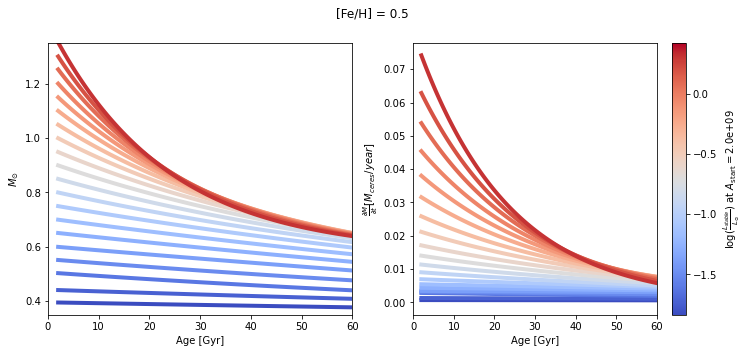

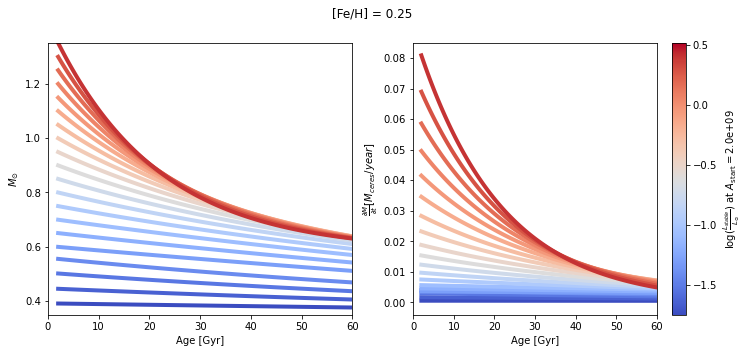

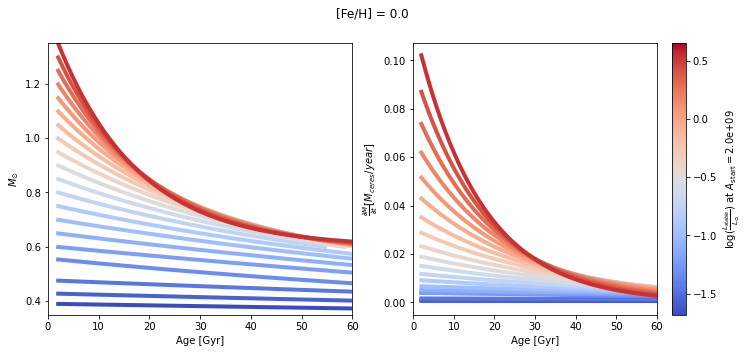

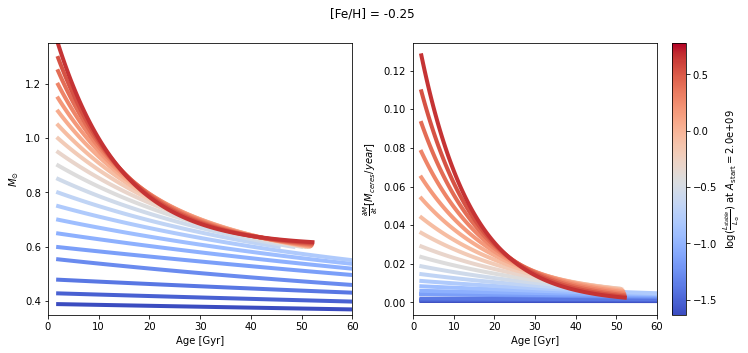

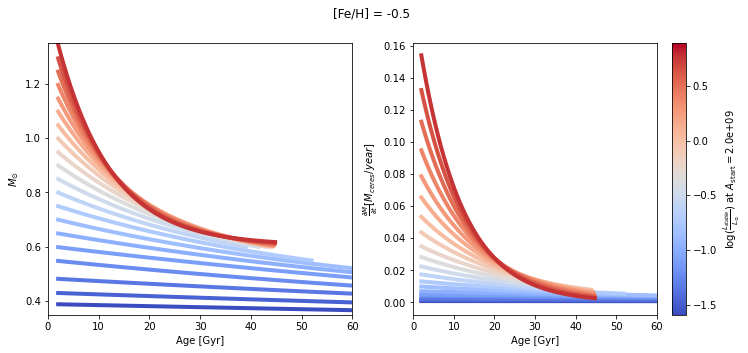

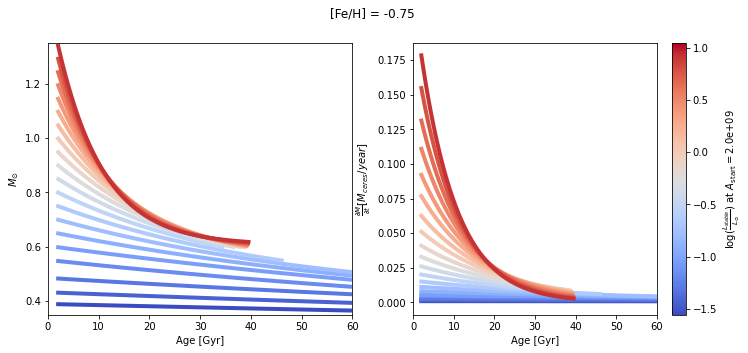

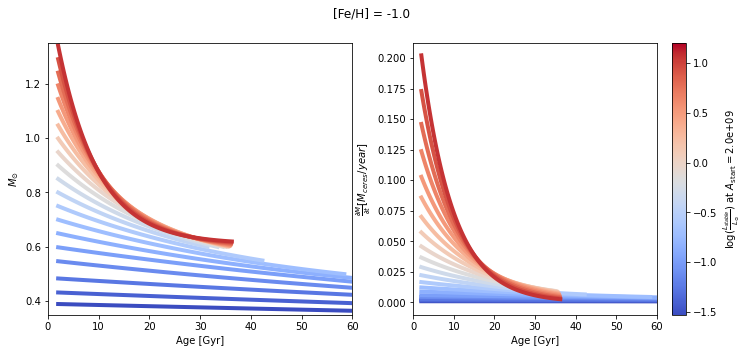

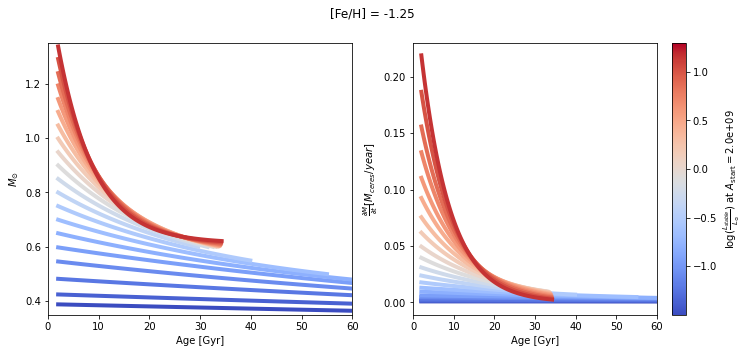

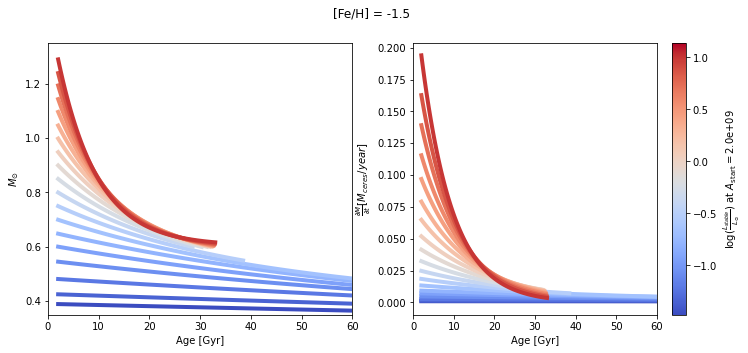

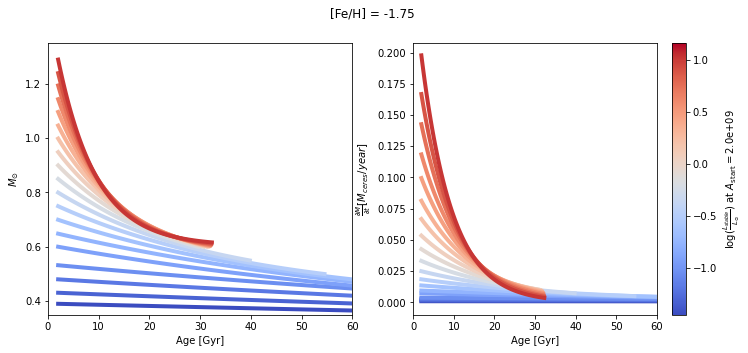

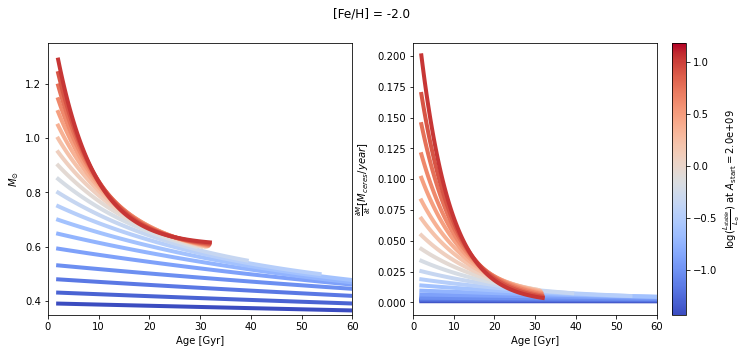

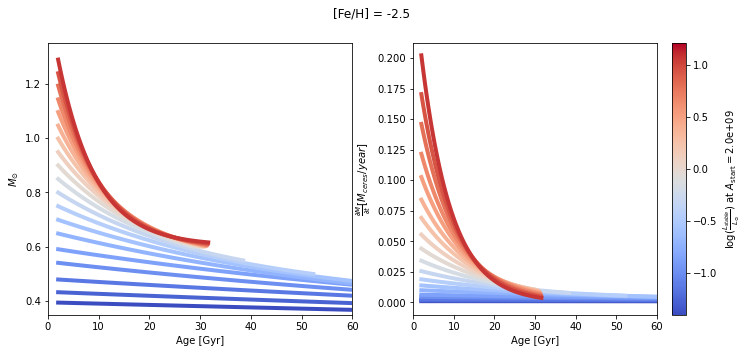

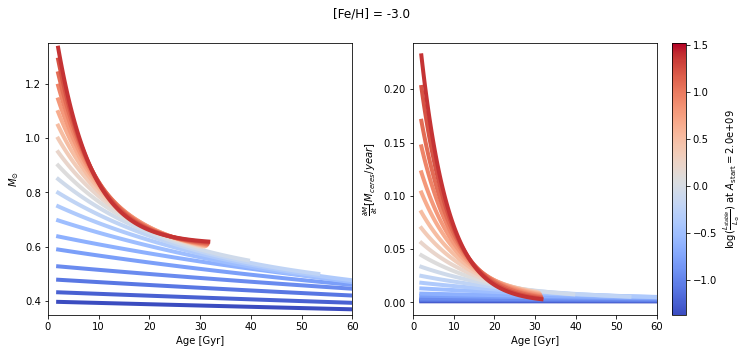

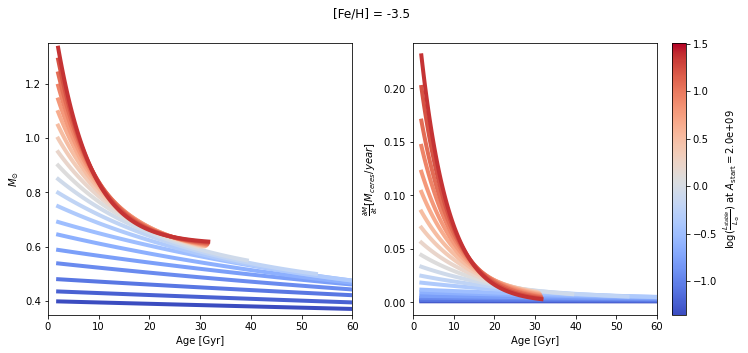

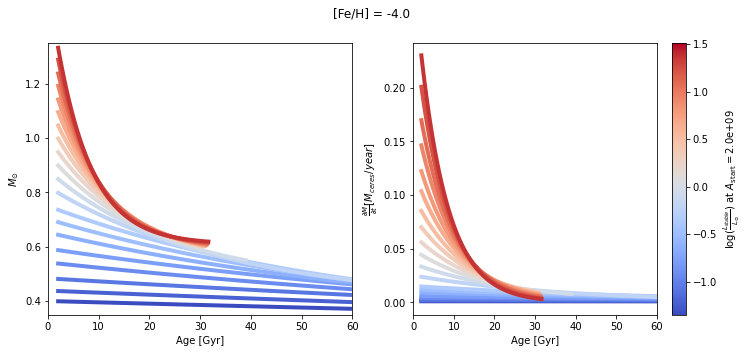

In [189]:
for i in range(len(all_indices)) :
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    
    for num,x in enumerate(all_indices[i]):
        pts = np.linspace(a_start, min(60e9,max(all_a[i][num])),120)
        a,b,c = all_exp_fits[i][num]
        axs[0].plot(pts/1e9, exp(pts,a,b,c), color=CMAP(x/len(all_l_stables[i])), lw=4)
        axs[1].plot(pts/1e9, -exp_der(pts,a,b,c)*m_sol/m_ceres, color=CMAP(x/len(all_l_stables[i])), lw=4)
        
    c = axs[1].scatter(np.zeros(len(all_l_stables[i])), np.zeros(len(all_l_stables[i])), cmap=CMAP, c=all_l_stables[i], s=0)
    axs[0].set_xlim(0,60)
    axs[0].set_ylim(m_eval[0]-0.05, m_eval[-1])
    axs[0].set_xlabel("Age [Gyr]")
    axs[0].set_ylabel(r"$M_{\odot}$")

    axs[1].set_xlim(0,60)
    axs[1].set_xlabel("Age [Gyr]")
    axs[1].set_ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
    fig.colorbar(c, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\rm start}=$"+str(f"{a_start:.1e}"))    

    plt.suptitle("[Fe/H] = "+str(feh[i]))
    if(feh[i] < 0): feh_st = "m"+str(np.abs(feh[i]))
    else: feh_st = "p"+str(np.abs(feh[i]))
    plt.savefig("figures/fit_figs/feh_"+feh_st+".pdf")
    

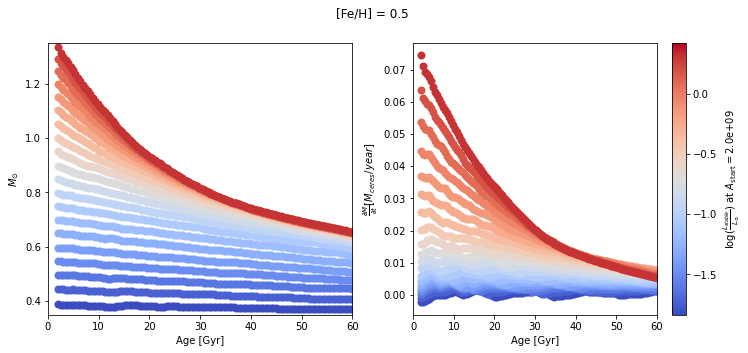

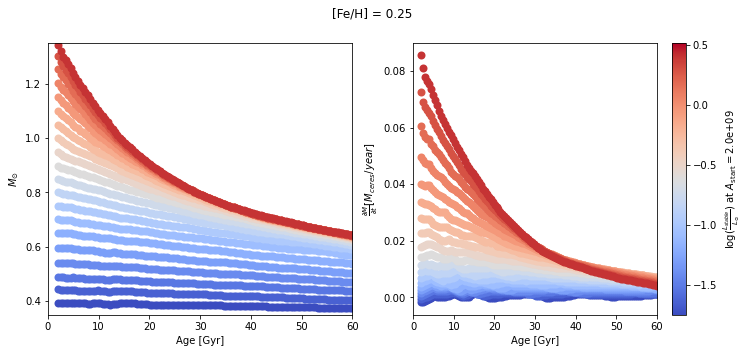

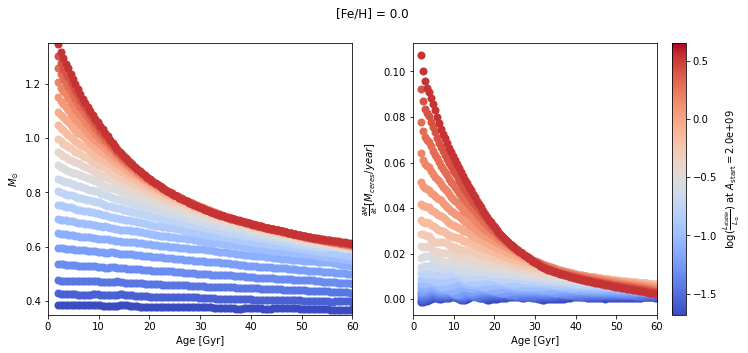

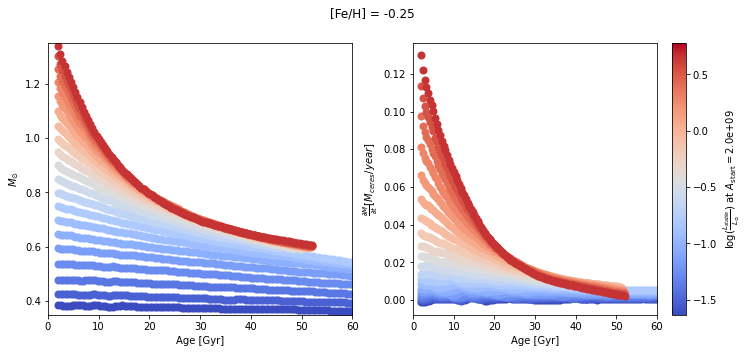

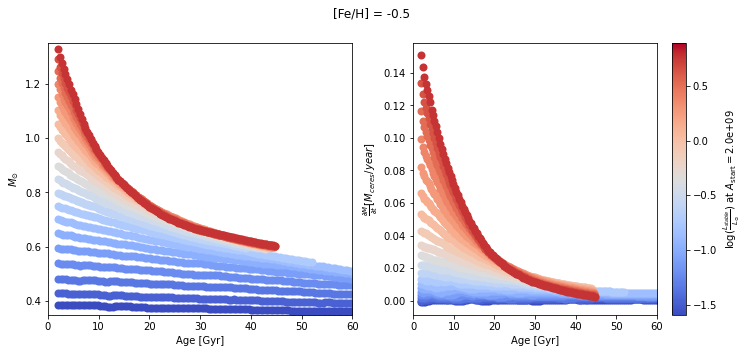

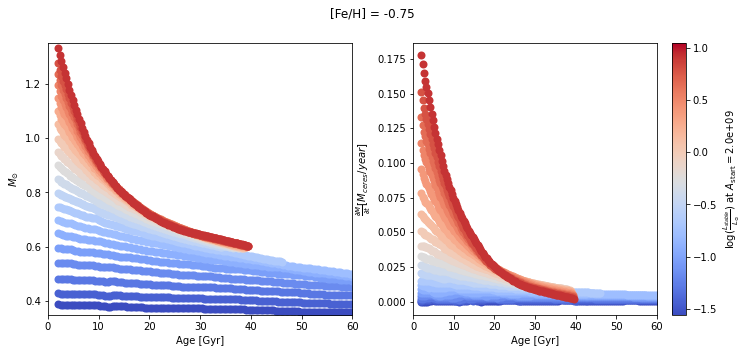

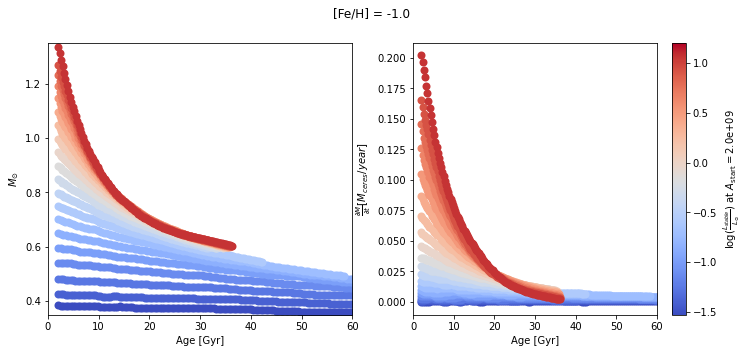

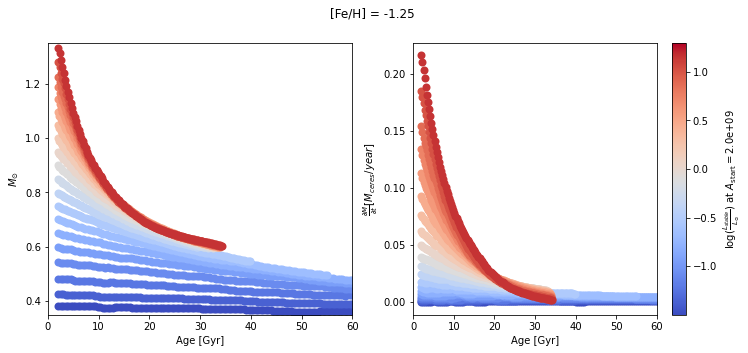

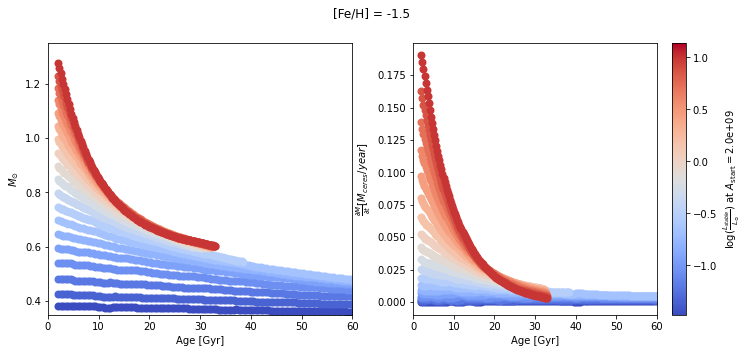

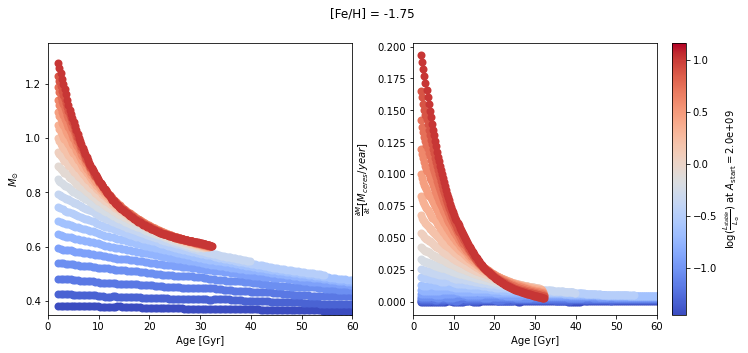

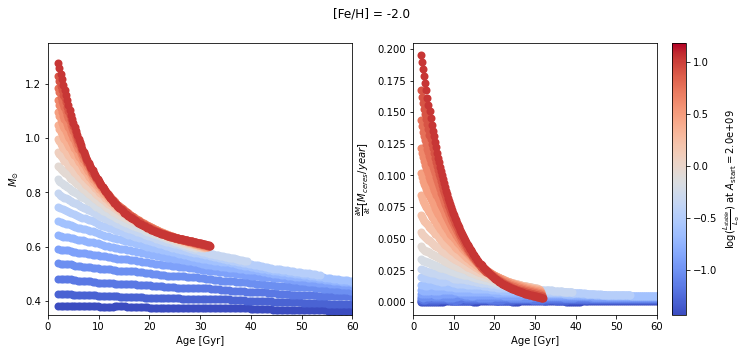

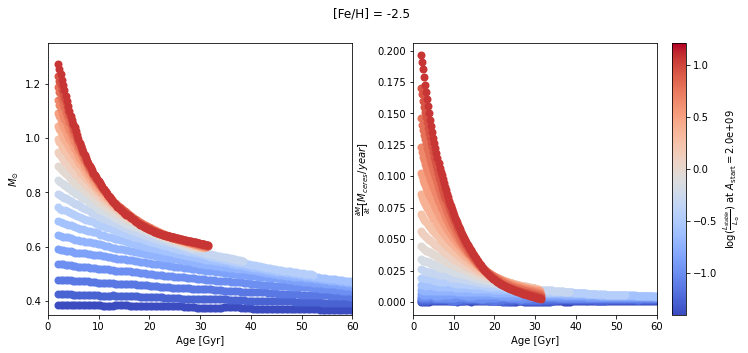

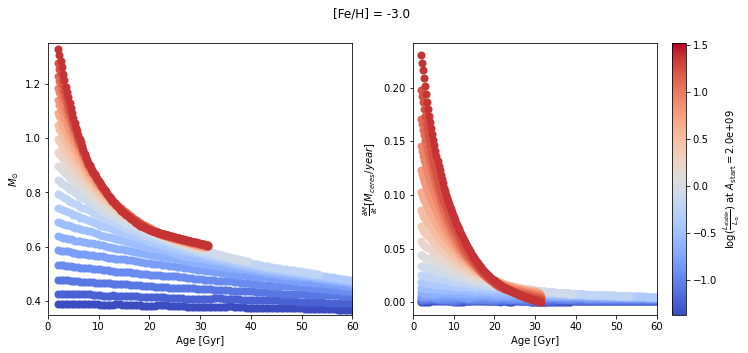

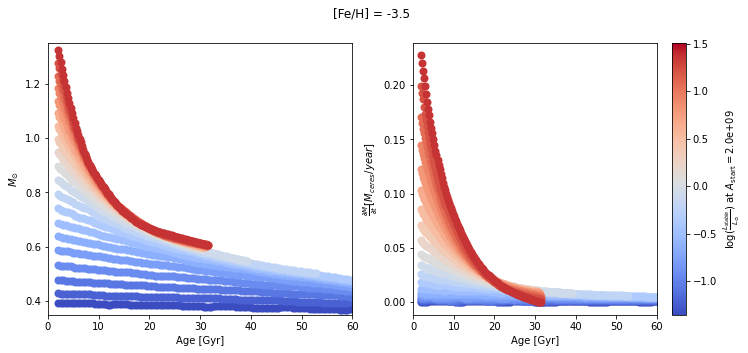

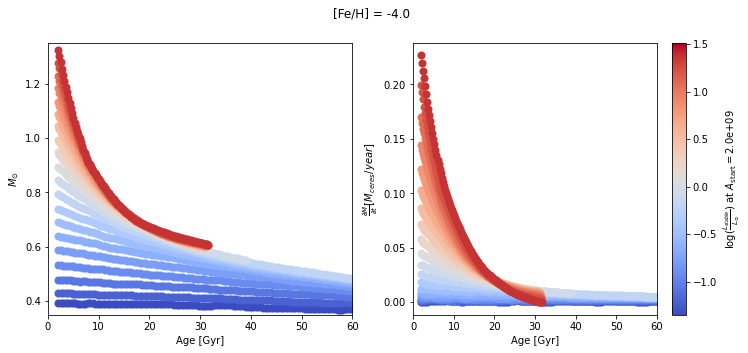

In [196]:
for i in range(len(all_indices)) :
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    
    for num,x in enumerate(all_indices[i]):
        pts = np.linspace(a_start, min(60e9,max(all_a[i][num])),120)
        
        m_predict,dmdt_predict,age_in,lum_in,feh_in = calc_ML([feh[i]],pts,[all_l_stables[i][x]])

        
        a,b,c = all_exp_fits[i][num]
        axs[0].scatter(pts/1e9, m_predict, color=CMAP(x/len(all_l_stables[i])), lw=2)
        axs[1].scatter(pts/1e9, dmdt_predict, color=CMAP(x/len(all_l_stables[i])), lw=2)
        #axs[1].plot(pts/1e9, -exp_der(pts,a,b,c)*m_sol/m_ceres, color=CMAP(x/len(all_l_stables[i])), lw=4)
        
    c = axs[1].scatter(np.zeros(len(all_l_stables[i])), np.zeros(len(all_l_stables[i])), cmap=CMAP, c=all_l_stables[i], s=0)
    axs[0].set_xlim(0,60)
    axs[0].set_ylim(m_eval[0]-0.05, m_eval[-1])
    axs[0].set_xlabel("Age [Gyr]")
    axs[0].set_ylabel(r"$M_{\odot}$")

    axs[1].set_xlim(0,60)
    axs[1].set_xlabel("Age [Gyr]")
    axs[1].set_ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(c, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\rm start}=$"+str(f"{a_start:.1e}"))    
    plt.suptitle("[Fe/H] = "+str(feh[i]))
    if(feh[i] < 0): feh_st = "m"+str(np.abs(feh[i]))
    else: feh_st = "p"+str(np.abs(feh[i]))
    plt.savefig("figures/ml_figs/feh_"+feh_st+".pdf")
    

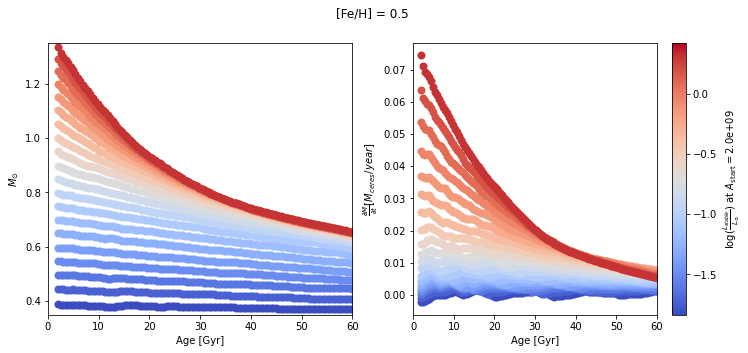

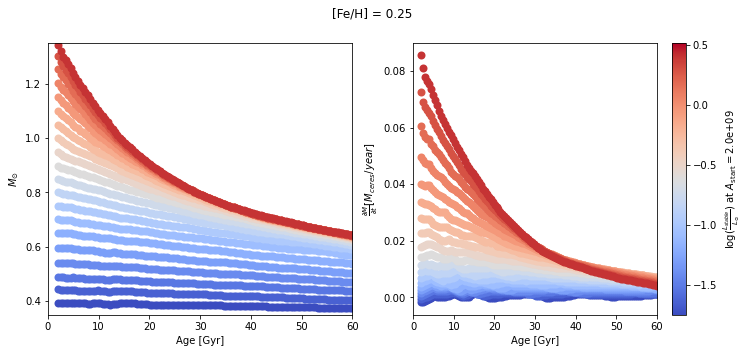

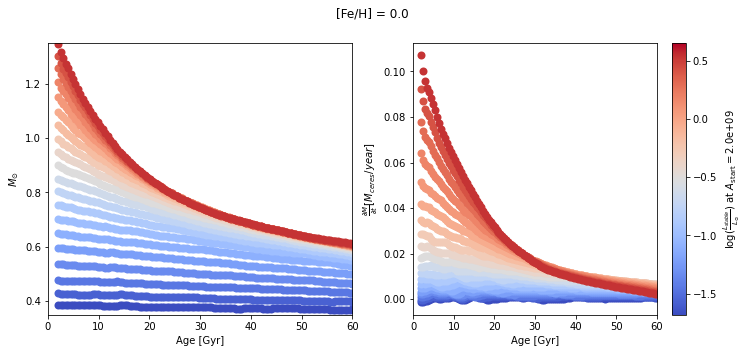

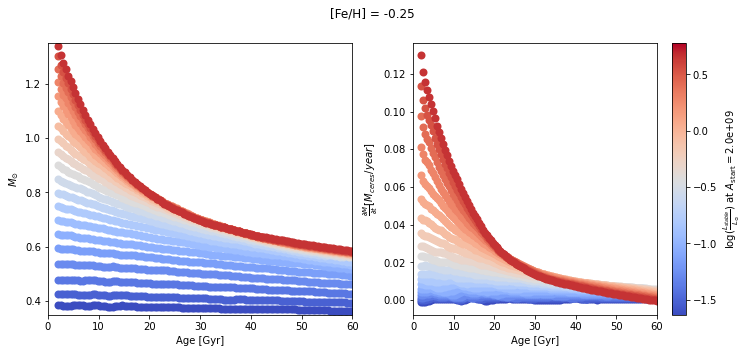

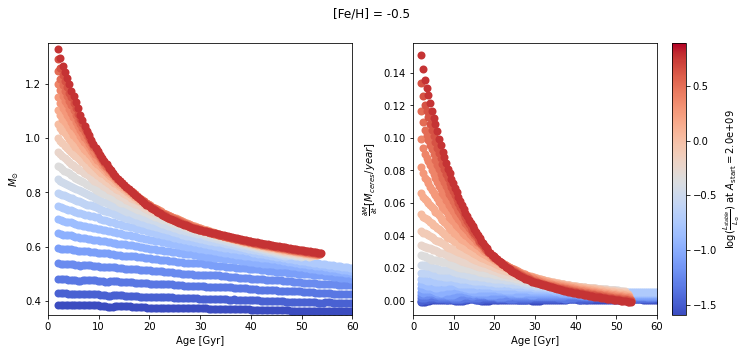

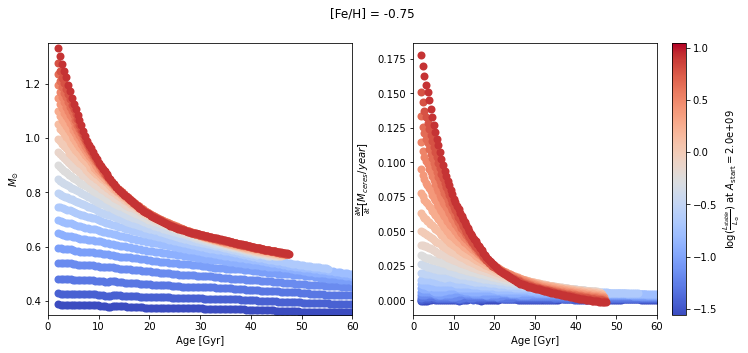

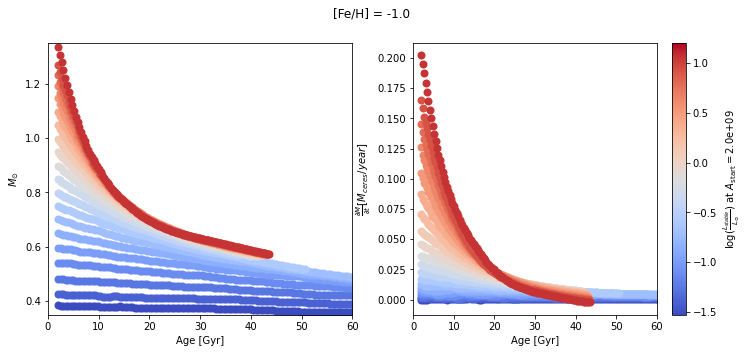

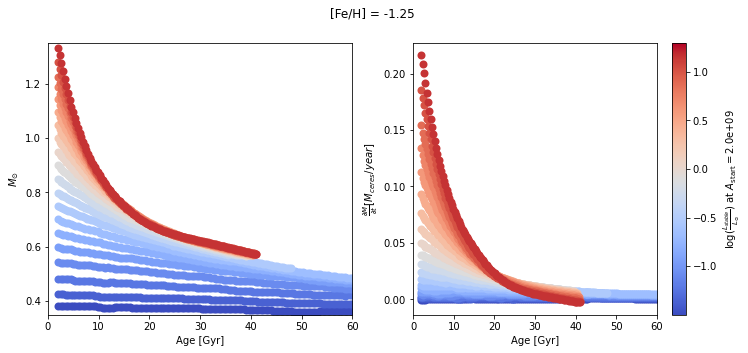

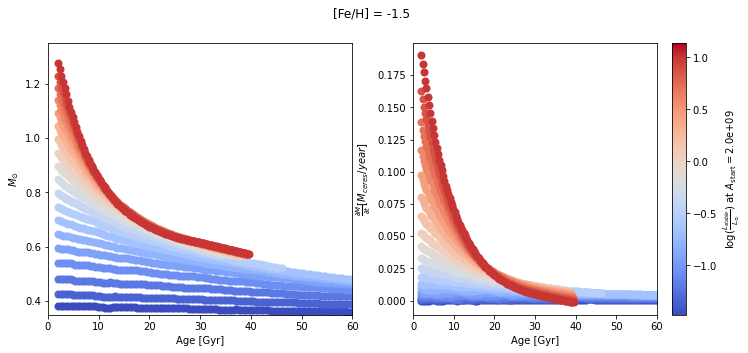

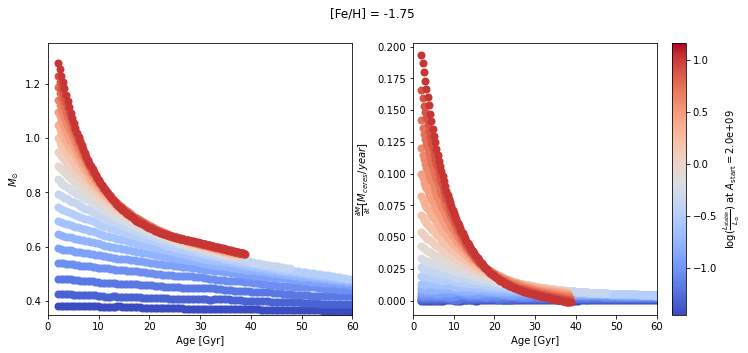

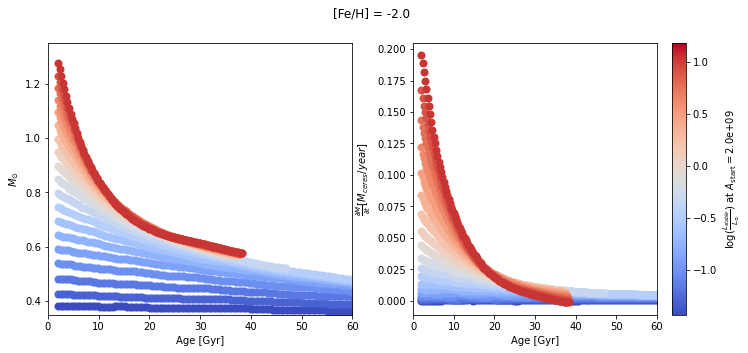

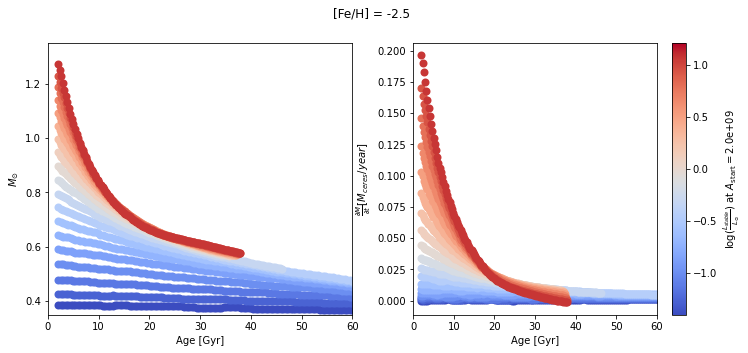

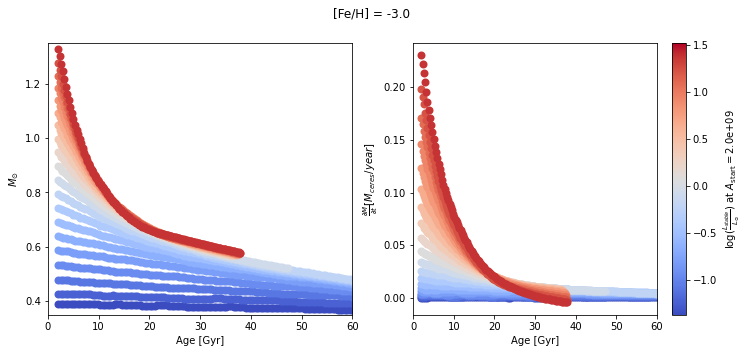

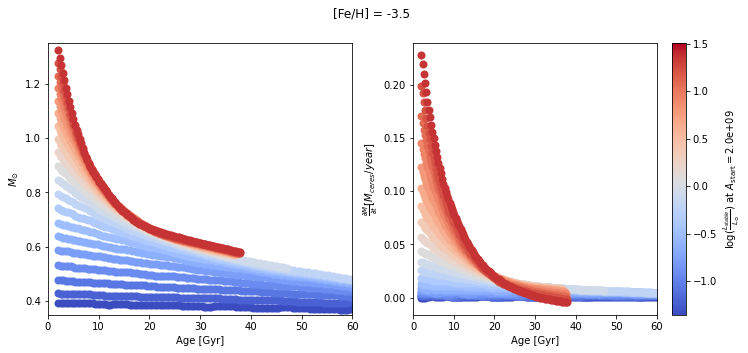

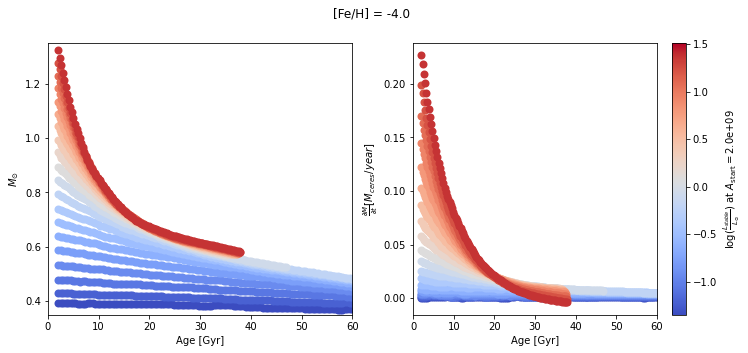

In [218]:
for i in range(len(all_indices)) :
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    
    for num,x in enumerate(all_indices[i]):
        pts = np.linspace(a_start, min(60e9,max(all_a[i][num])*1.2),120)
        
        m_predict,dmdt_predict,age_in,lum_in,feh_in = calc_ML([feh[i]],pts,[all_l_stables[i][x]])

        
        a,b,c = all_exp_fits[i][num]
        axs[0].scatter(pts/1e9, m_predict, color=CMAP(x/len(all_l_stables[i])), lw=2)
        axs[1].scatter(pts/1e9, dmdt_predict, color=CMAP(x/len(all_l_stables[i])), lw=2)
        #axs[1].plot(pts/1e9, -exp_der(pts,a,b,c)*m_sol/m_ceres, color=CMAP(x/len(all_l_stables[i])), lw=4)
        
    c = axs[1].scatter(np.zeros(len(all_l_stables[i])), np.zeros(len(all_l_stables[i])), cmap=CMAP, c=all_l_stables[i], s=0)
    axs[0].set_xlim(0,60)
    axs[0].set_ylim(m_eval[0]-0.05, m_eval[-1])
    axs[0].set_xlabel("Age [Gyr]")
    axs[0].set_ylabel(r"$M_{\odot}$")

    axs[1].set_xlim(0,60)
    axs[1].set_xlabel("Age [Gyr]")
    axs[1].set_ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(c, label=r"log($\frac{L_{stable}}{L_{\odot}}$) at $A_{\rm start}=$"+str(f"{a_start:.1e}"))    
    plt.suptitle("[Fe/H] = "+str(feh[i]))
    if(feh[i] < 0): feh_st = "m"+str(np.abs(feh[i]))
    else: feh_st = "p"+str(np.abs(feh[i]))
    plt.savefig("figures/ml_figs/feh_"+feh_st+".pdf")
    

In [204]:
i=np.where(np.abs(np.array(feh)+4) < 0.01)[0][0]
j=np.argmax(np.array(all_l_stables[i]))

pts = np.linspace(a_start,60e9,500)
m_predict,dmdt_predict,age_in,lum_in,feh_in = calc_ML([feh[i]],pts,[2.5-1])
fit_ages, fit_masses = all_a[i][j]/1e9, all_m[i][j]

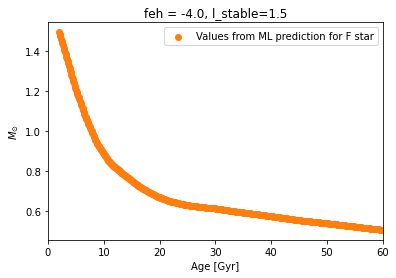

In [206]:
b=ml_bounds()
normalize = matplotlib.colors.Normalize(vmin=b.l_min, vmax=b.l_max)
plt.scatter(np.array(pts)/1e9, m_predict, c="tab:orange", label="Values from ML prediction for F star")
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$M_{\odot}$")
plt.legend()
plt.xlim(0,60)
plt.title("feh = "+str(feh[i])+", l_stable="+str(2.5-1))
plt.savefig("figures/m_vs_a_for_f_star.pdf")

# Graveyard

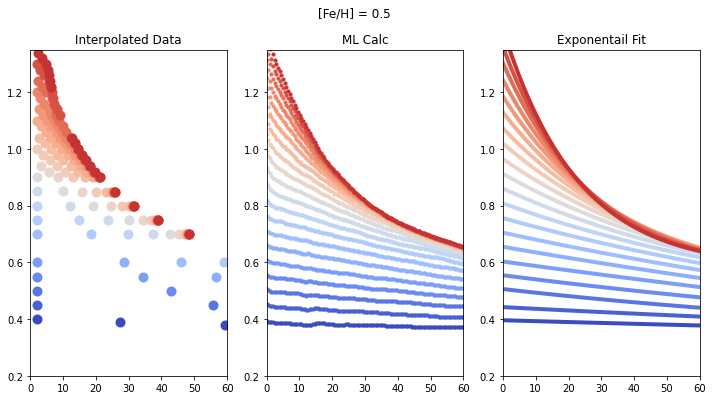

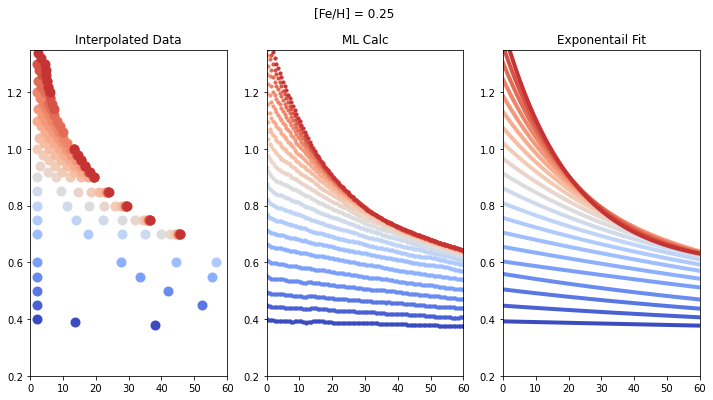

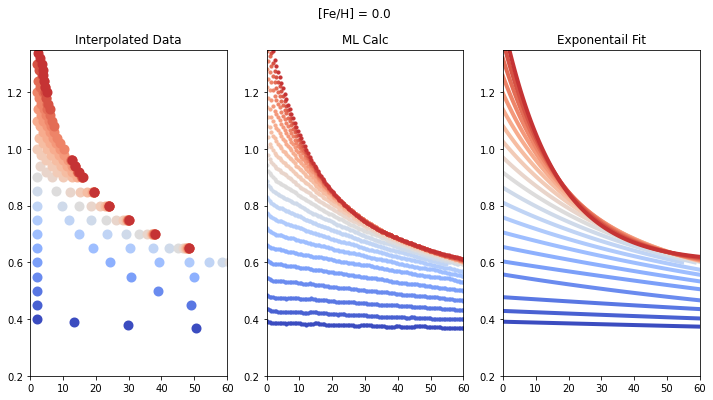

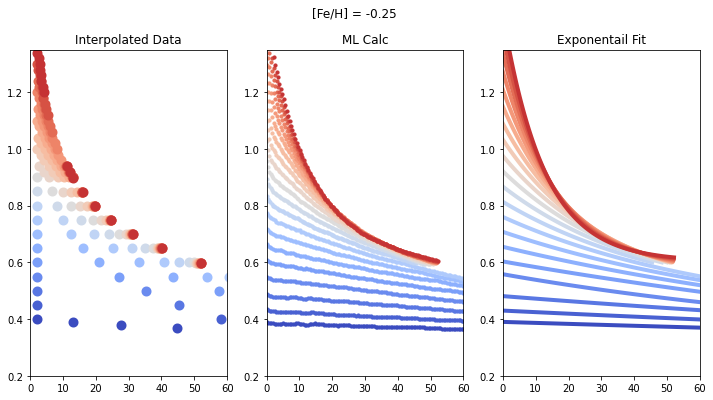

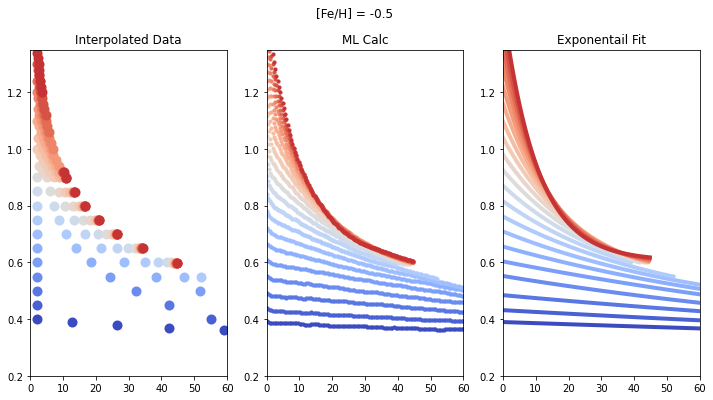

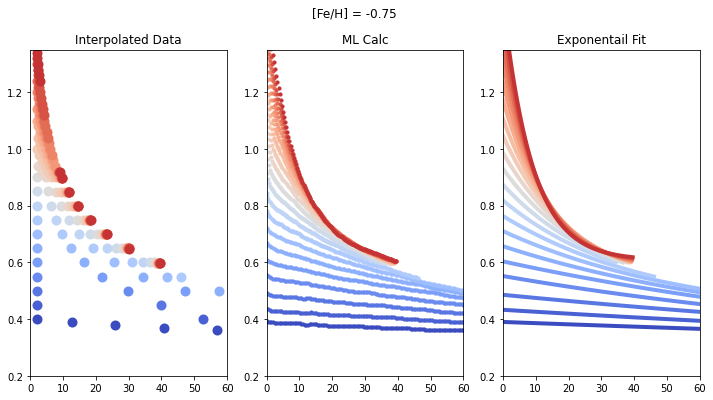

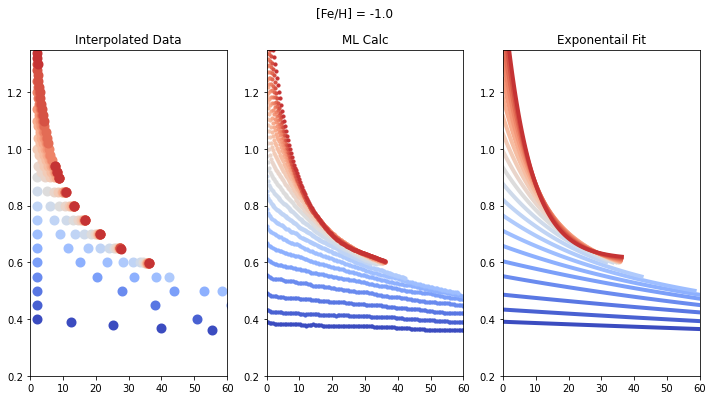

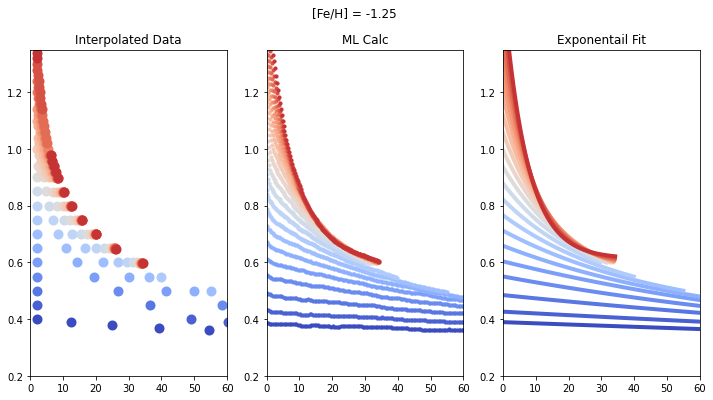

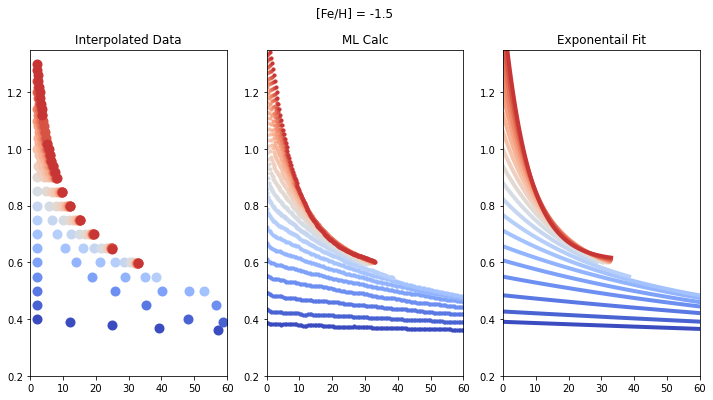

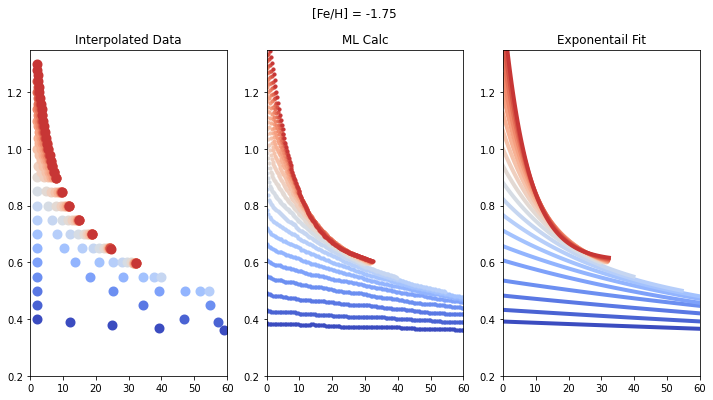

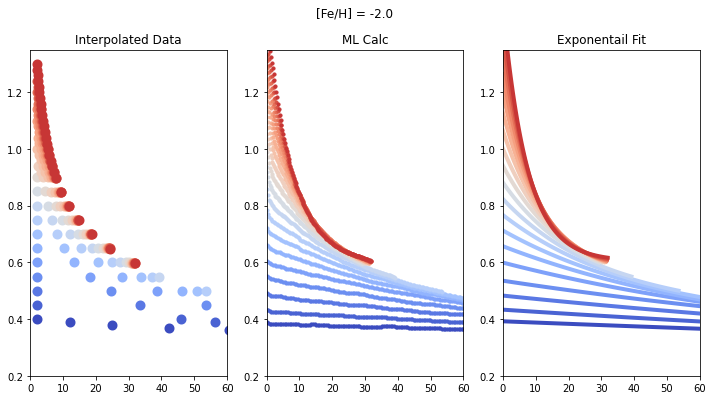

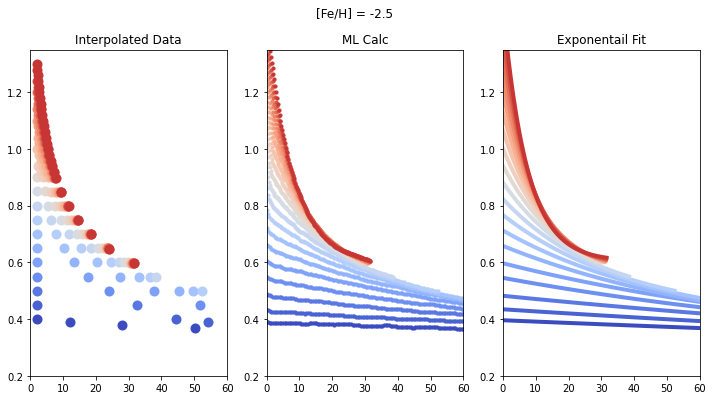

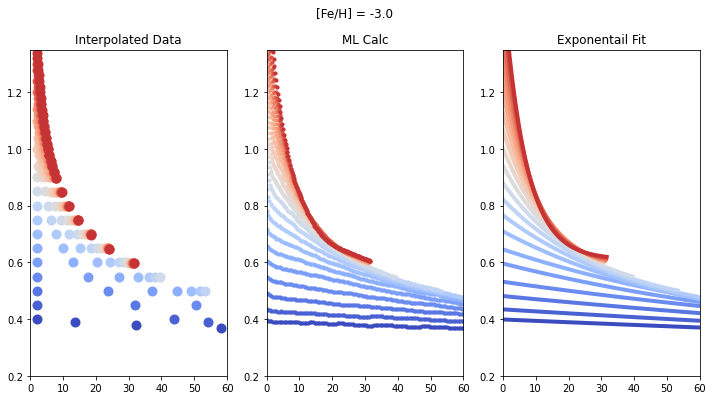

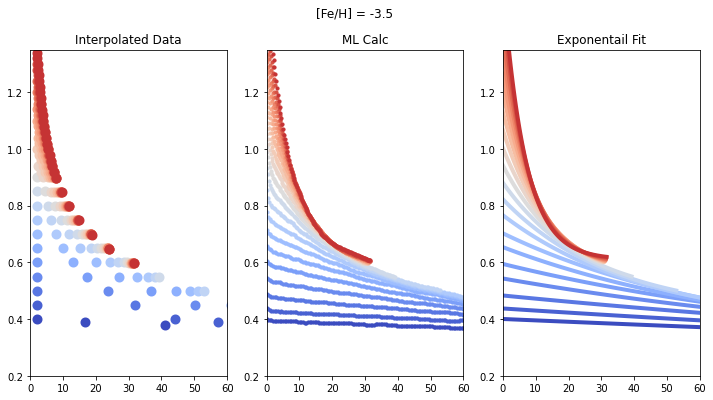

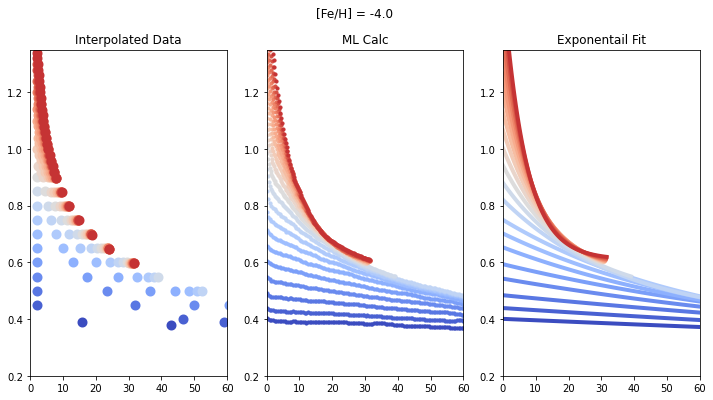

In [161]:
for i in range(len(all_indices)):
    fig, axs = plt.subplots(1,3, figsize=(12,6))
    for num,x in enumerate(all_indices[i]):

        pts = np.linspace(0, min(60e9,max(all_a[i][num])),120)
        axs[0].scatter(all_a[i][num]/1e9, all_m[i][num], color=CMAP(x/len(all_l_stables[i])), lw=4)


        m_predict,age_in,lum_in,feh_in = calc_ML([feh[i]],pts,[all_l_stables[i][x]])


        axs[1].scatter(age_in/1e9, m_predict, color=CMAP(x/len(all_l_stables[i])), s=10)
        a,b,c = all_exp_fits[i][num]
        #axs[2].scatter(age_in/1e9, m_predict, color=CMAP(x/len(all_l_stables[i])), s=15, alpha=0.5)

        axs[2].plot(pts/1e9, exp(pts,a,b,c), color=CMAP(x/len(all_l_stables[i])), lw=4)
    titles = ["Interpolated Data", "ML Calc", "Exponentail Fit"]
    for x in range(3): 
        axs[x].set_xlim(0,60)
        axs[x].set_ylim(m_eval[0]-0.2, m_eval[-1])
        axs[x].set_title(titles[x])

    plt.suptitle("[Fe/H] = "+str(feh[i]))

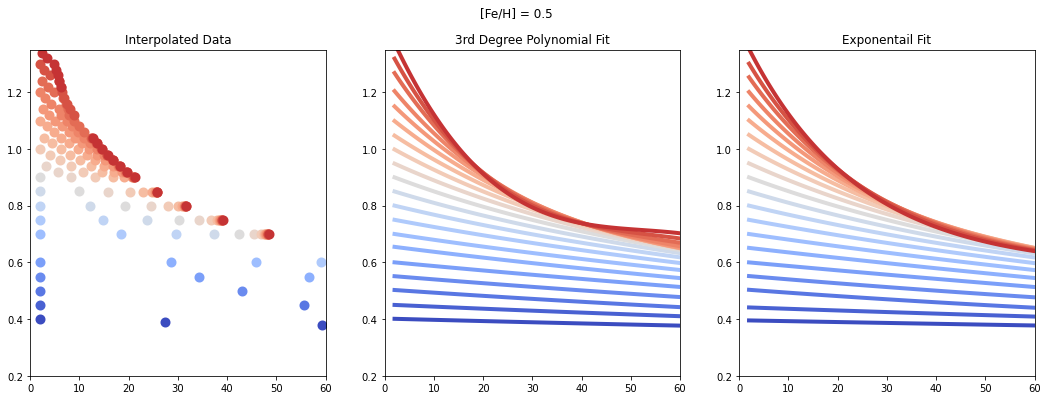

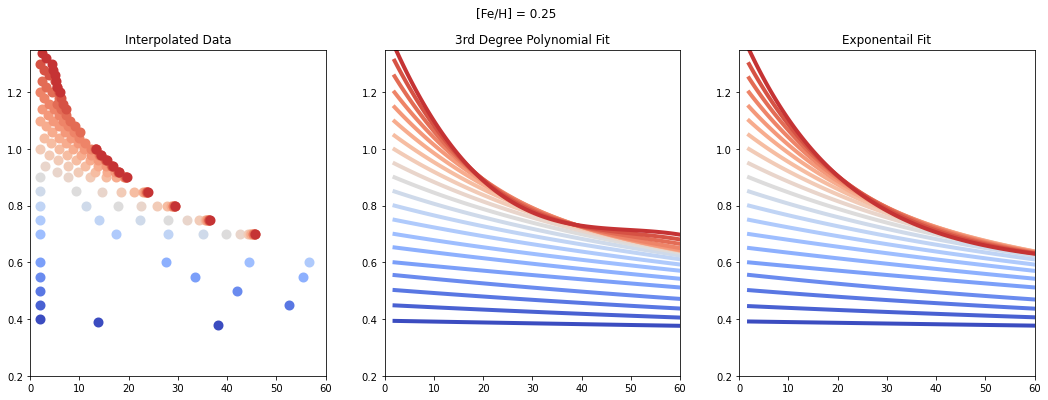

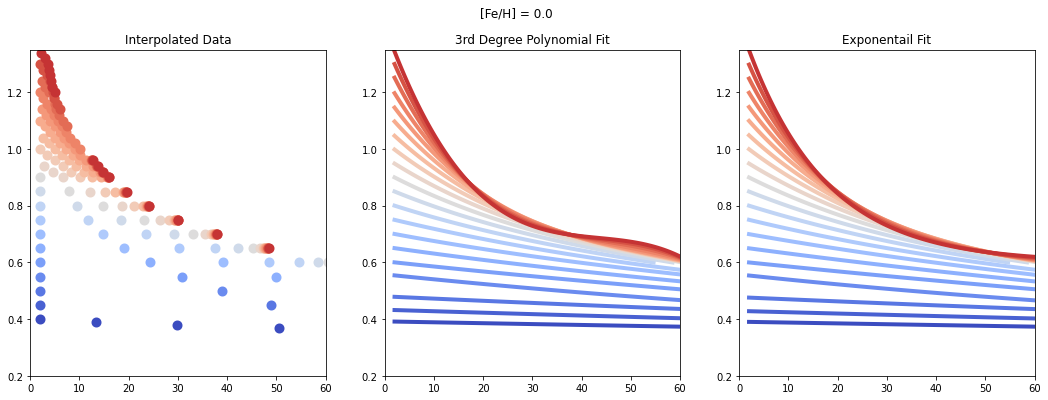

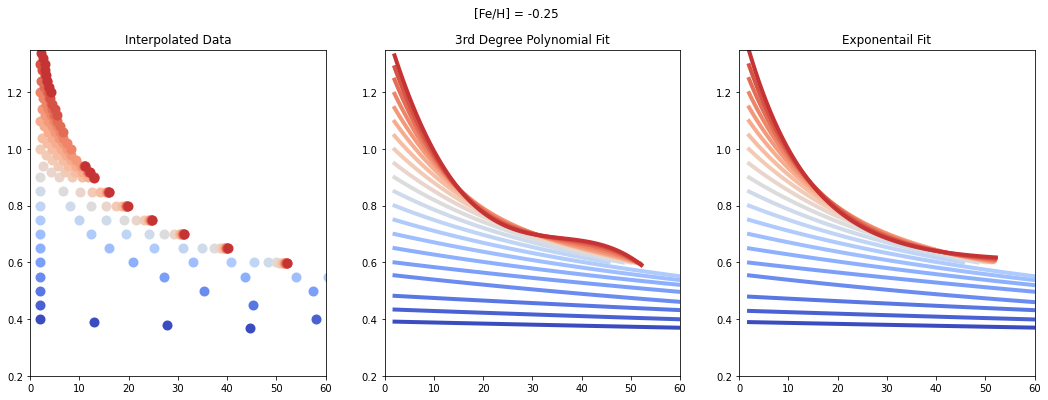

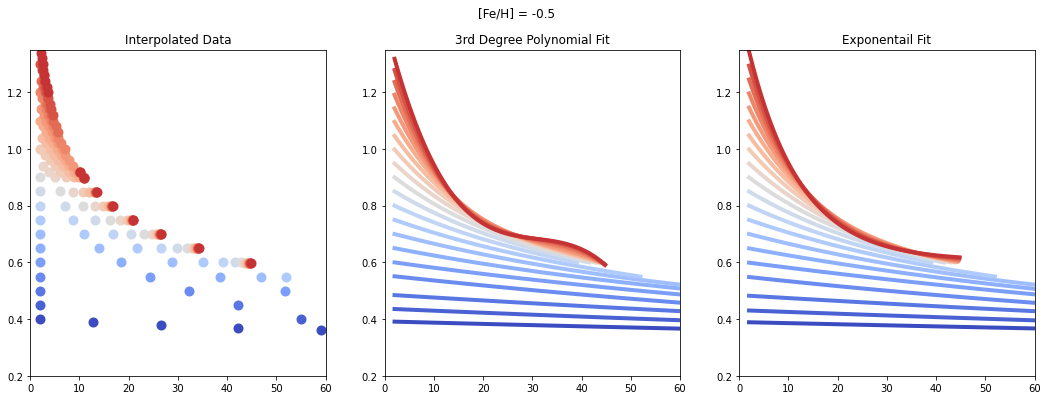

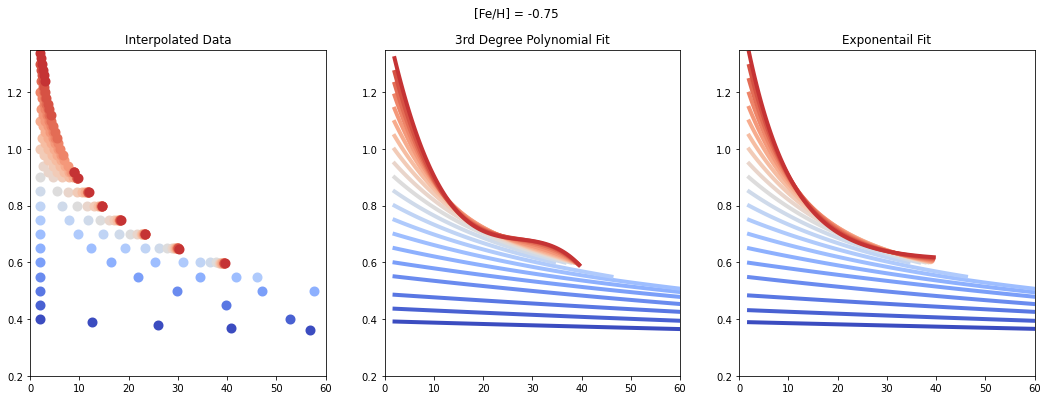

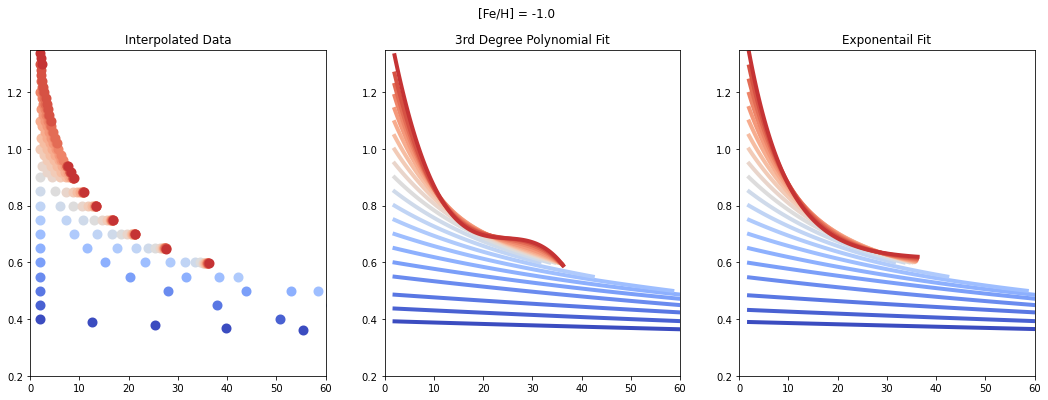

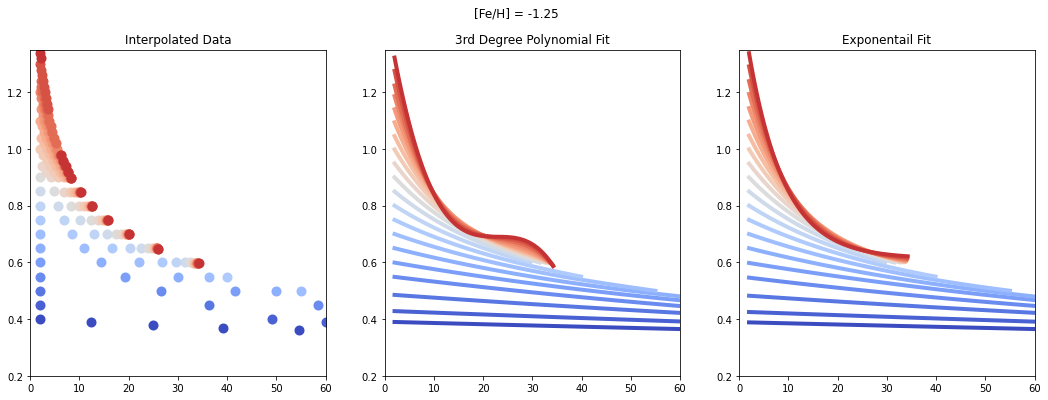

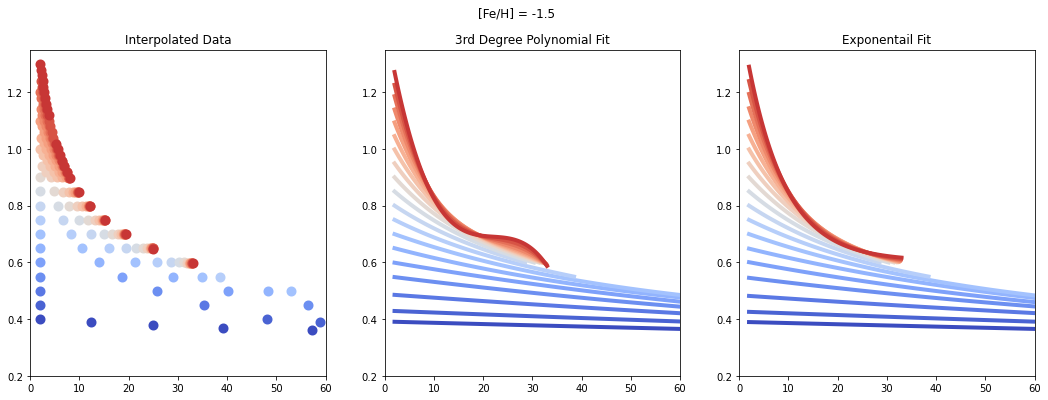

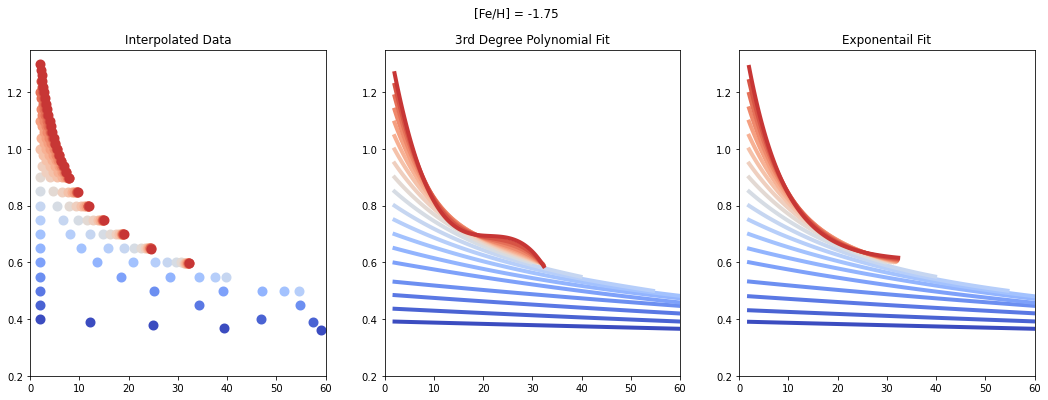

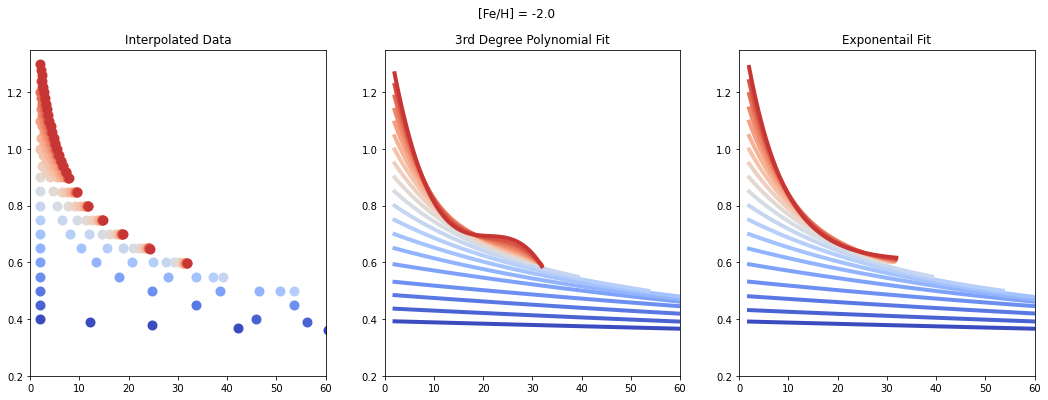

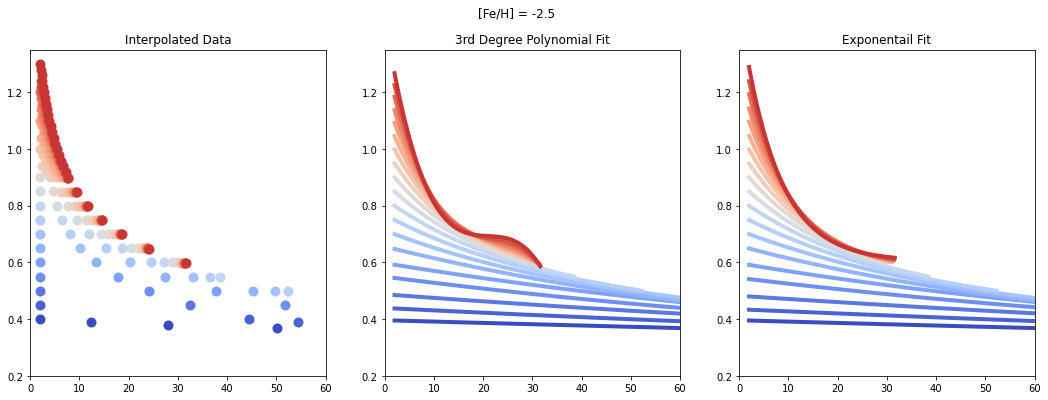

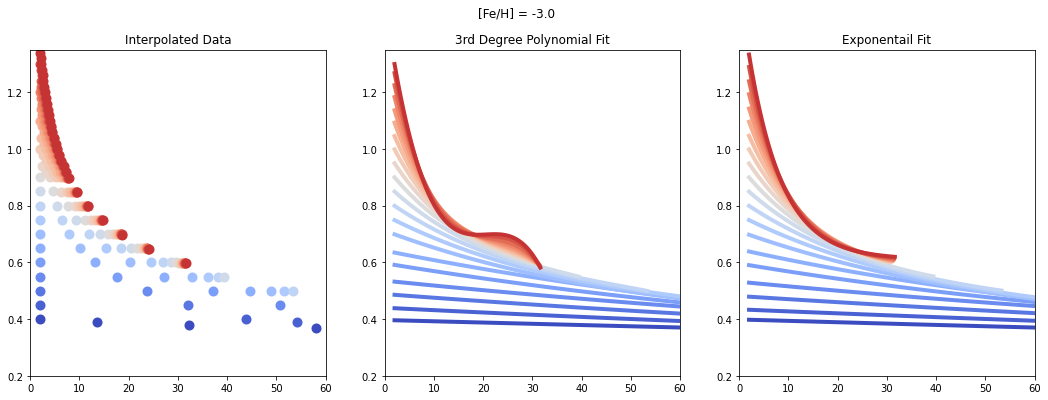

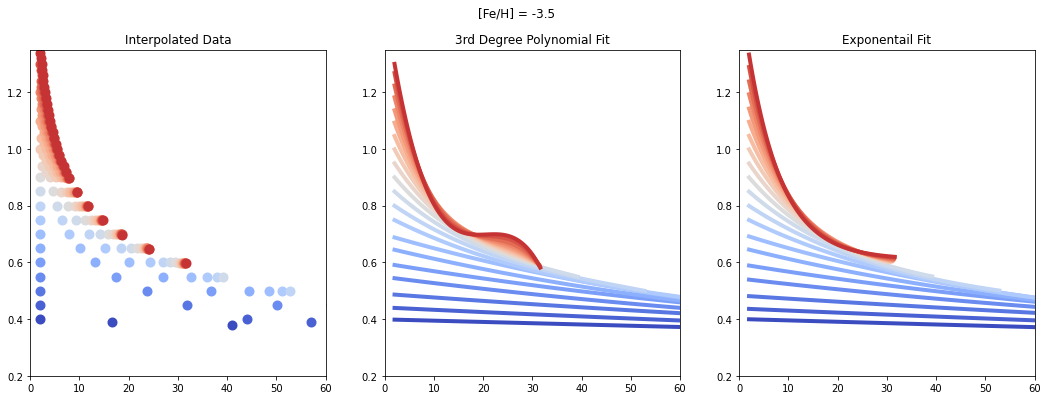

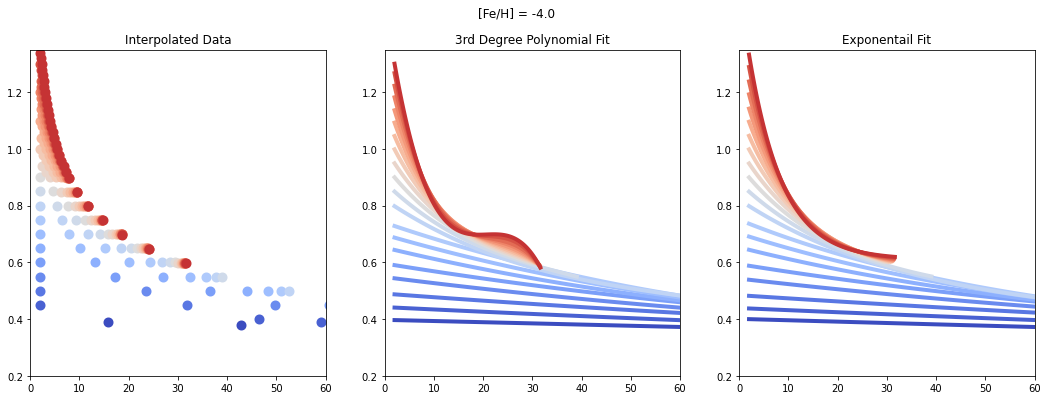

In [12]:
for i in range(len(all_indices)) :
    #if(np.abs(feh[i]+2.5 ) < 0.05):
    fig, axs = plt.subplots(1,3, figsize=(18,6))
    for num,x in enumerate(all_indices[i]):
        pts = np.linspace(a_start, min(60e9,max(all_a[i][num])),120)
        axs[0].scatter(all_a[i][num]/1e9, all_m[i][num], color=CMAP(x/len(all_l_stables[i])), lw=4)
        axs[1].plot(pts/1e9, (np.poly1d(all_poly_fits[i][num]))(pts), color=CMAP(x/len(all_l_stables[i])), lw=4)
        a,b,c = all_exp_fits[i][num]
        axs[2].plot(pts/1e9, exp(pts,a,b,c), color=CMAP(x/len(all_l_stables[i])), lw=4)
    titles = ["Interpolated Data", "3rd Degree Polynomial Fit", "Exponentail Fit"]
    for x in range(3): 
        axs[x].set_xlim(0,60)
        axs[x].set_ylim(m_eval[0]-0.2, m_eval[-1])
        axs[x].set_title(titles[x])

    plt.suptitle("[Fe/H] = "+str(feh[i]))

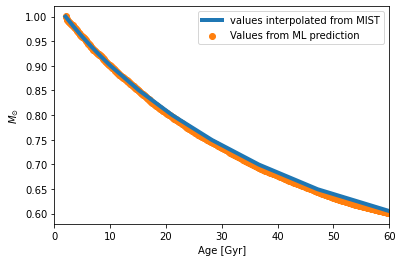

In [96]:
i=np.where(np.abs(np.array(feh)) < 0.01)[0][0]
j=np.argmin(np.abs(np.array(all_l_stables[i])))

pts = np.linspace(a_start,60e9,500)
m_predict,age_in,lum_in,feh_in = calc_ML([0.0],pts,[all_l_stables[i][j]])
solar_ages, solar_masses = all_a[i][j]/1e9, all_m[i][j]

b=ml_bounds()
normalize = matplotlib.colors.Normalize(vmin=b.l_min, vmax=b.l_max)
#plt.scatter(np.array(age)/1e9, m_predict, c=lum, s=5, cmap=CMAP, norm=normalize, label="Values from ML prediction")
plt.scatter(np.array(pts)/1e9, m_predict, c="tab:orange", label="Values from ML prediction")
plt.plot(solar_ages,solar_masses, c="tab:blue", label="values interpolated from MIST", lw=4)
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$M_{\odot}$")
plt.legend()
plt.xlim(0,60)
plt.savefig("figures/ml_vs_mist_for_sun.pdf")